In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# Load the dataset
dataset = pd.read_csv('Dataset.csv')
dataset.head()

,Gender,Customer Type,Age,Type of Travel,Class,Arrival Service,Booking Services,Immediate Transfer,Lounge Service,Check-in Service,Boarding Service,Layover Service,Onboard Services,Baggage Service,Immigration Security,Call Center Service,Departure Delay,Arrival Delay,Total Delay,Satisfaction
0,Female,Loyal Customer,59,Business travel,Business,4,2,2,1,4,2,5,2,5,5,3,0,0.0,0.0,Satisfied
1,Female,Loyal Customer,46,Business travel,Business,5,1,3,3,3,1,3,3,5,4,1,20,2000.0,26.0,Satisfied
2,Male,Loyal Customer,45,Business travel,Eco,3,1,1,4,4,3,3,3,5,2,5,0,0.0,0.0,Satisfied
3,Female,Loyal Customer,40,Business travel,Business,5,1,2,5,1,4,2,2,4,5,5,0,0.0,0.0,Satisfied
4,Male,Loyal Customer,54,Business travel,Business,5,3,1,5,2,4,5,1,2,5,2,0,0.0,0.0,Satisfied


#### Step 1: Data Understanding

In [26]:
import pandas as pd

# Load the dataset (assuming it's already in a variable named 'dataset')
dataset.info()  # Check data types and non-null counts


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                20000 non-null  object 
 1   Customer Type         20000 non-null  object 
 2   Age                   20000 non-null  int64  
 3   Type of Travel        20000 non-null  object 
 4   Class                 20000 non-null  object 
 5   Arrival Service       20000 non-null  int64  
 6   Booking Services      20000 non-null  int64  
 7   Immediate Transfer    20000 non-null  int64  
 8   Lounge Service        20000 non-null  int64  
 9   Check-in Service      20000 non-null  int64  
 10  Boarding Service      20000 non-null  int64  
 11  Layover Service       20000 non-null  int64  
 12  Onboard Services      20000 non-null  int64  
 13  Baggage Service       20000 non-null  int64  
 14  Immigration Security  20000 non-null  int64  
 15  Call Center Service

In [27]:
dataset.describe().T  # Summary statistics for numerical and categorical columns

,count,mean,std,min,25%,50%,75%,max
Age,20000.0,40.805250,14.033238,7.0,30.0,42.0,51.0,350.0
Arrival Service,20000.0,2.995300,1.420978,1.0,2.0,3.0,4.0,5.0
Booking Services,20000.0,3.026000,1.414434,1.0,2.0,3.0,4.0,5.0
Immediate Transfer,20000.0,3.001350,1.415679,1.0,2.0,3.0,4.0,5.0
Lounge Service,20000.0,3.000100,1.413400,1.0,2.0,3.0,4.0,5.0
Check-in Service,20000.0,2.989100,1.422035,1.0,2.0,3.0,4.0,5.0
Boarding Service,20000.0,3.024450,1.413737,1.0,2.0,3.0,4.0,5.0
Layover Service,20000.0,2.989700,1.416049,1.0,2.0,3.0,4.0,5.0
Onboard Services,20000.0,3.006950,1.411418,1.0,2.0,3.0,4.0,5.0
Baggage Service,20000.0,2.983500,1.414047,1.0,2.0,3.0,4.0,5.0


#### Step 2: Data Cleaning

In [28]:
import warnings
warnings.filterwarnings('ignore')
# Check for missing values
missing_data = dataset.isnull().sum()

# Handling missing values (if any)
dataset['Arrival Delay'].fillna(dataset['Arrival Delay'].mean(), inplace=True)  # Filling with mean (or other suitable methods)

# Check for duplicates
duplicates = dataset.duplicated().sum()

# Remove duplicates if any
dataset = dataset.drop_duplicates()


#### Step 3: Categorical Data Analysis

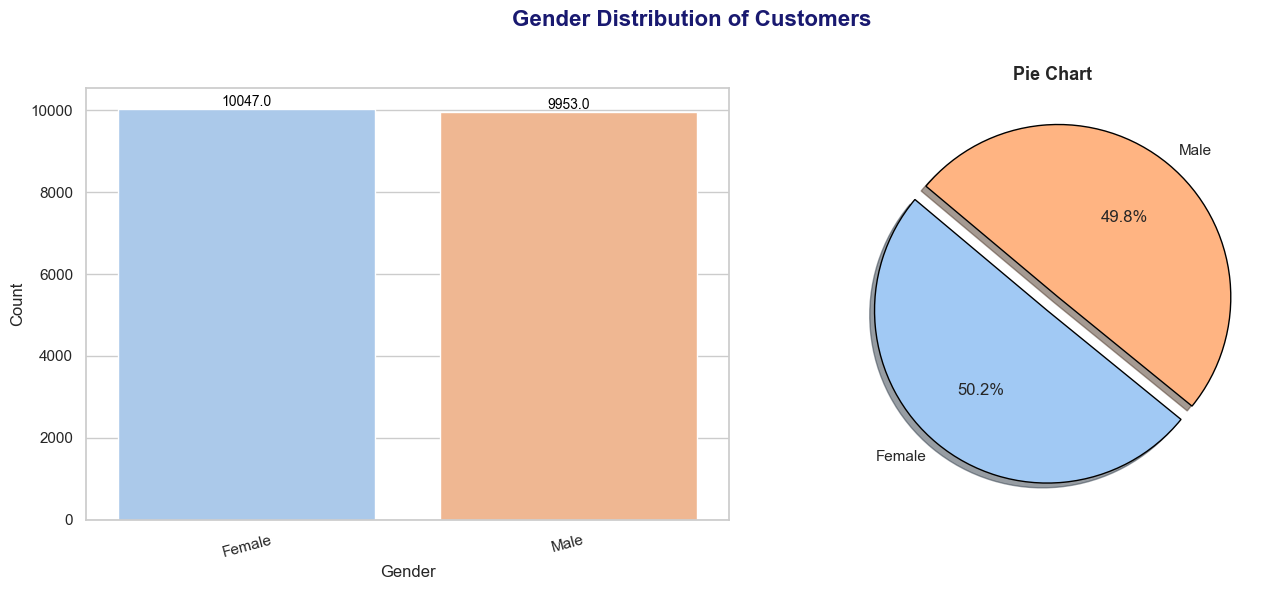

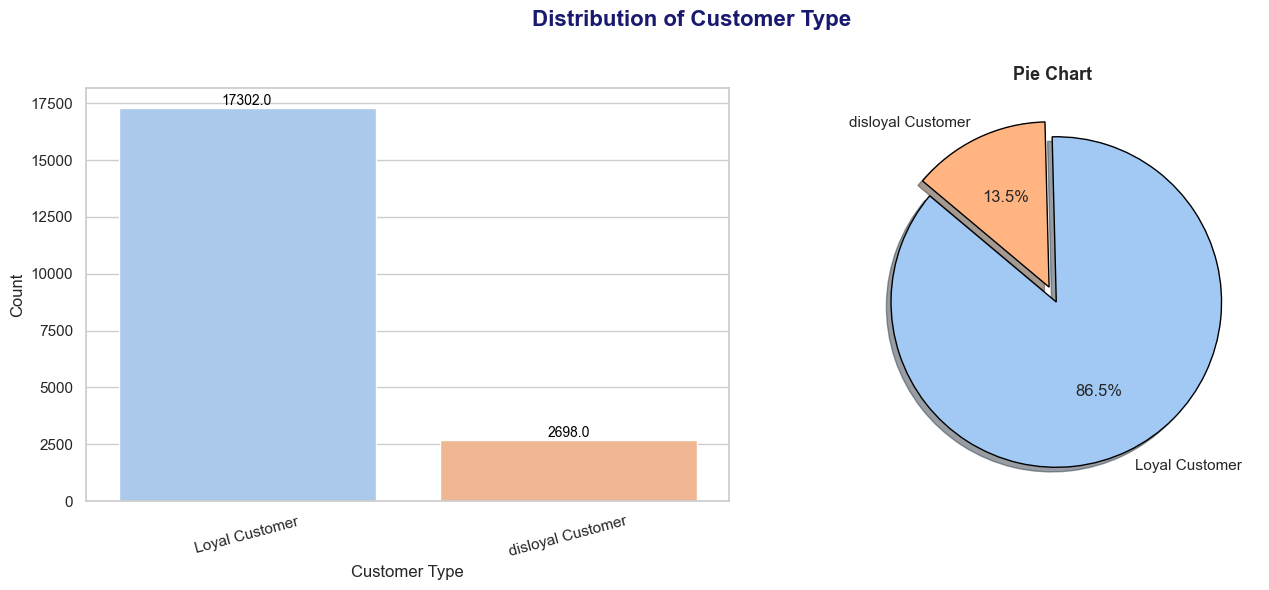

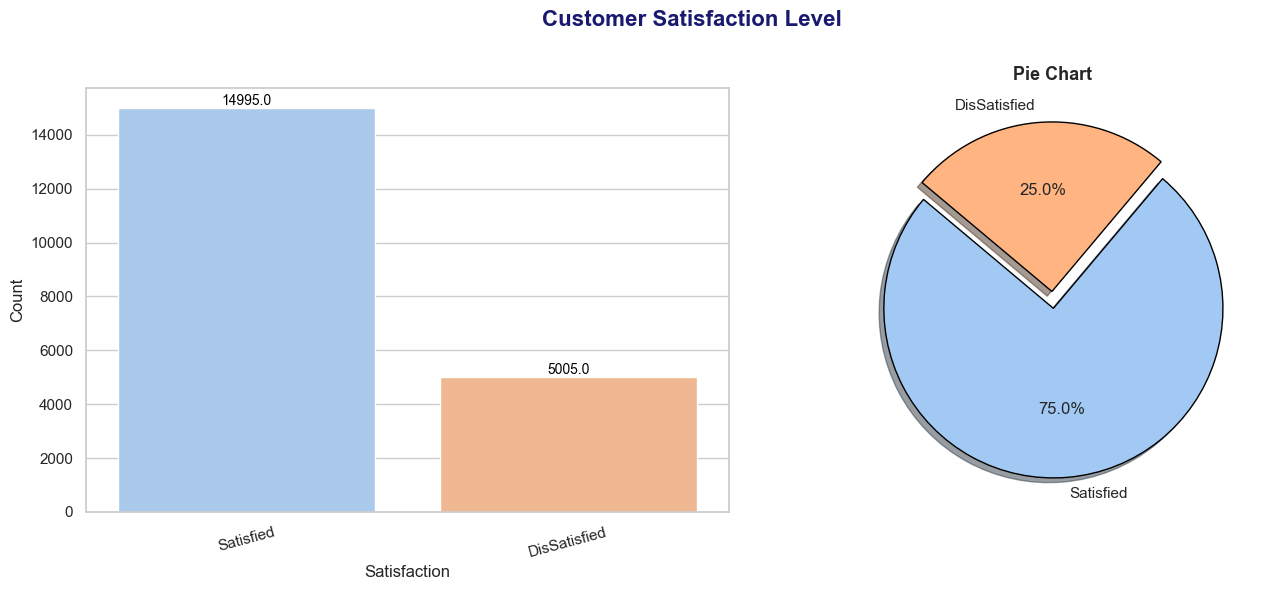

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid", context='notebook')

# Define a function to annotate bars
def annotate_bars(ax):
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom', fontsize=10, color='black')

# Custom color palette
custom_palette = sns.color_palette("pastel")

# Categories to visualize
columns = ['Gender', 'Customer Type', 'Satisfaction']
titles = [
    "Gender Distribution of Customers",
    "Distribution of Customer Type",
    "Customer Satisfaction Level"
]

# Loop through each categorical column
for col, title in zip(columns, titles):
    # Calculate value counts
    counts = dataset[col].value_counts()
    labels = counts.index
    values = counts.values
    proportions = values / values.sum()

    # Create subplots
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))
    fig.suptitle(title, fontsize=16, fontweight='bold', color='midnightblue')

    # Bar plot
    ax_bar = sns.countplot(data=dataset, x=col, palette=custom_palette, ax=axs[0])
    annotate_bars(ax_bar)
    axs[0].set_xlabel(col, fontsize=12)
    axs[0].set_ylabel("Count", fontsize=12)
    axs[0].tick_params(axis='x', labelrotation=15)

    # Pie chart
    axs[1].pie(
        values,
        labels=labels,
        autopct='%1.1f%%',
        startangle=140,
        colors=custom_palette,
        shadow=True,
        explode=[0.05]*len(values),
        wedgeprops={'edgecolor': 'black'}
    )
    axs[1].set_title("Pie Chart", fontsize=13, fontweight='bold')

    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()


#### Step 4: Numerical Data Analysis

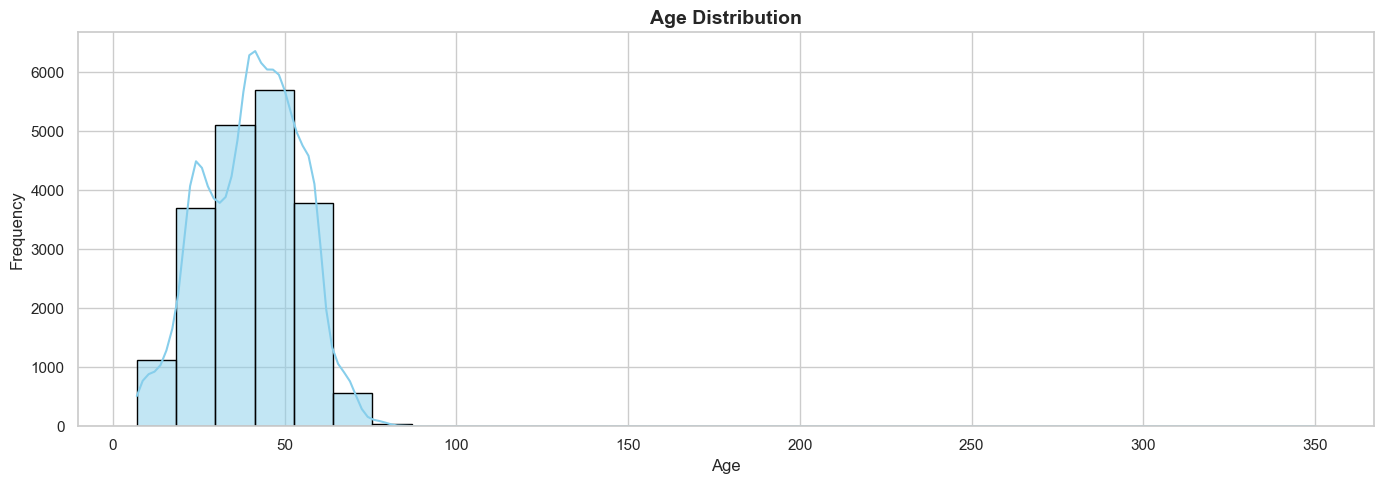

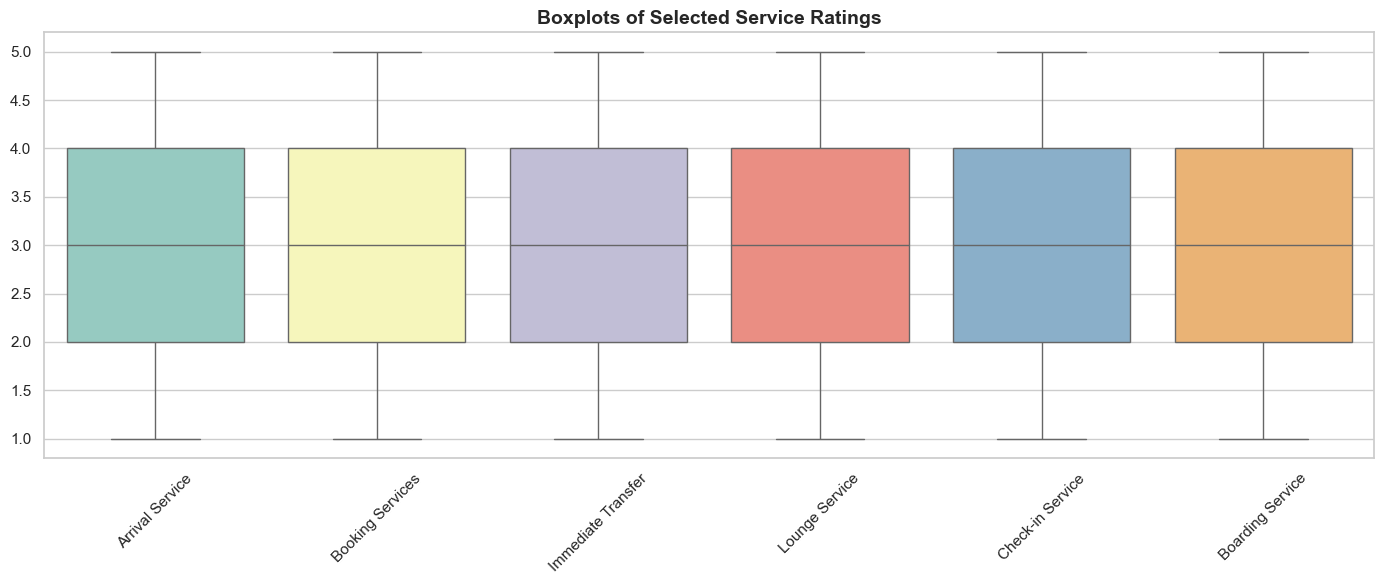

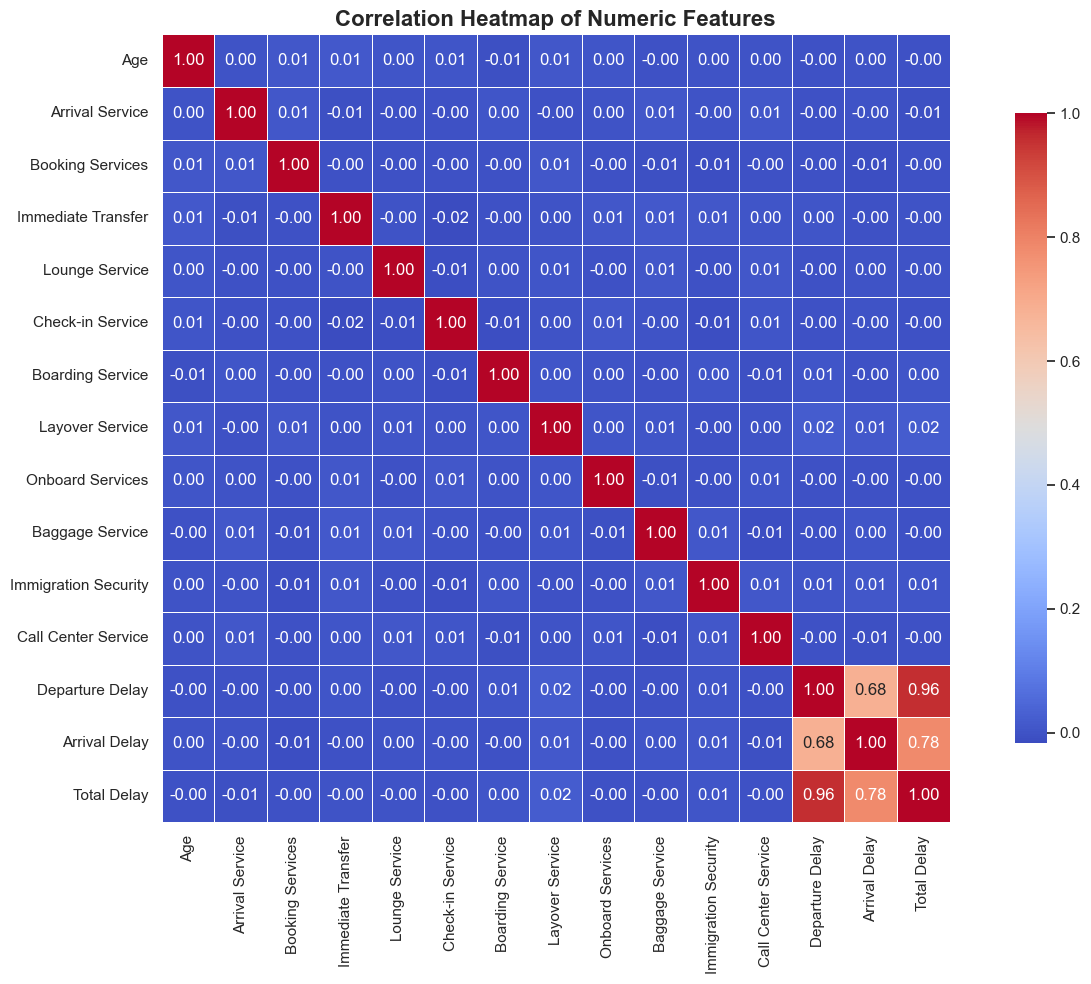

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid", context='notebook')

# Select only numerical columns (excluding 'Customer ID' if it's an identifier)
numeric_cols = dataset.select_dtypes(include='number')

# 1. Distribution of 'Age'
plt.figure(figsize=(14, 5))
sns.histplot(dataset['Age'], kde=True, color='skyblue', bins=30, edgecolor='black')
plt.title("Age Distribution", fontsize=14, fontweight='bold')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# 2. Boxplots for service ratings (selecting a few representative columns)
service_columns = [
    'Arrival Service', 'Booking Services', 'Immediate Transfer', 
    'Lounge Service', 'Check-in Service', 'Boarding Service'
]

plt.figure(figsize=(14, 6))
sns.boxplot(data=dataset[service_columns], palette='Set3')
plt.title("Boxplots of Selected Service Ratings", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Correlation Heatmap
plt.figure(figsize=(14, 10))
corr_matrix = numeric_cols.corr()

sns.heatmap(
    corr_matrix, 
    annot=True, 
    cmap='coolwarm', 
    fmt='.2f', 
    linewidths=0.5, 
    cbar_kws={"shrink": 0.8},
    square=True
)
plt.title("Correlation Heatmap of Numeric Features", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


In [31]:
dataset.head()

,Gender,Customer Type,Age,Type of Travel,Class,Arrival Service,Booking Services,Immediate Transfer,Lounge Service,Check-in Service,Boarding Service,Layover Service,Onboard Services,Baggage Service,Immigration Security,Call Center Service,Departure Delay,Arrival Delay,Total Delay,Satisfaction
0,Female,Loyal Customer,59,Business travel,Business,4,2,2,1,4,2,5,2,5,5,3,0,0.0,0.0,Satisfied
1,Female,Loyal Customer,46,Business travel,Business,5,1,3,3,3,1,3,3,5,4,1,20,2000.0,26.0,Satisfied
2,Male,Loyal Customer,45,Business travel,Eco,3,1,1,4,4,3,3,3,5,2,5,0,0.0,0.0,Satisfied
3,Female,Loyal Customer,40,Business travel,Business,5,1,2,5,1,4,2,2,4,5,5,0,0.0,0.0,Satisfied
4,Male,Loyal Customer,54,Business travel,Business,5,3,1,5,2,4,5,1,2,5,2,0,0.0,0.0,Satisfied


#### Step 5: Relationship Between Variables

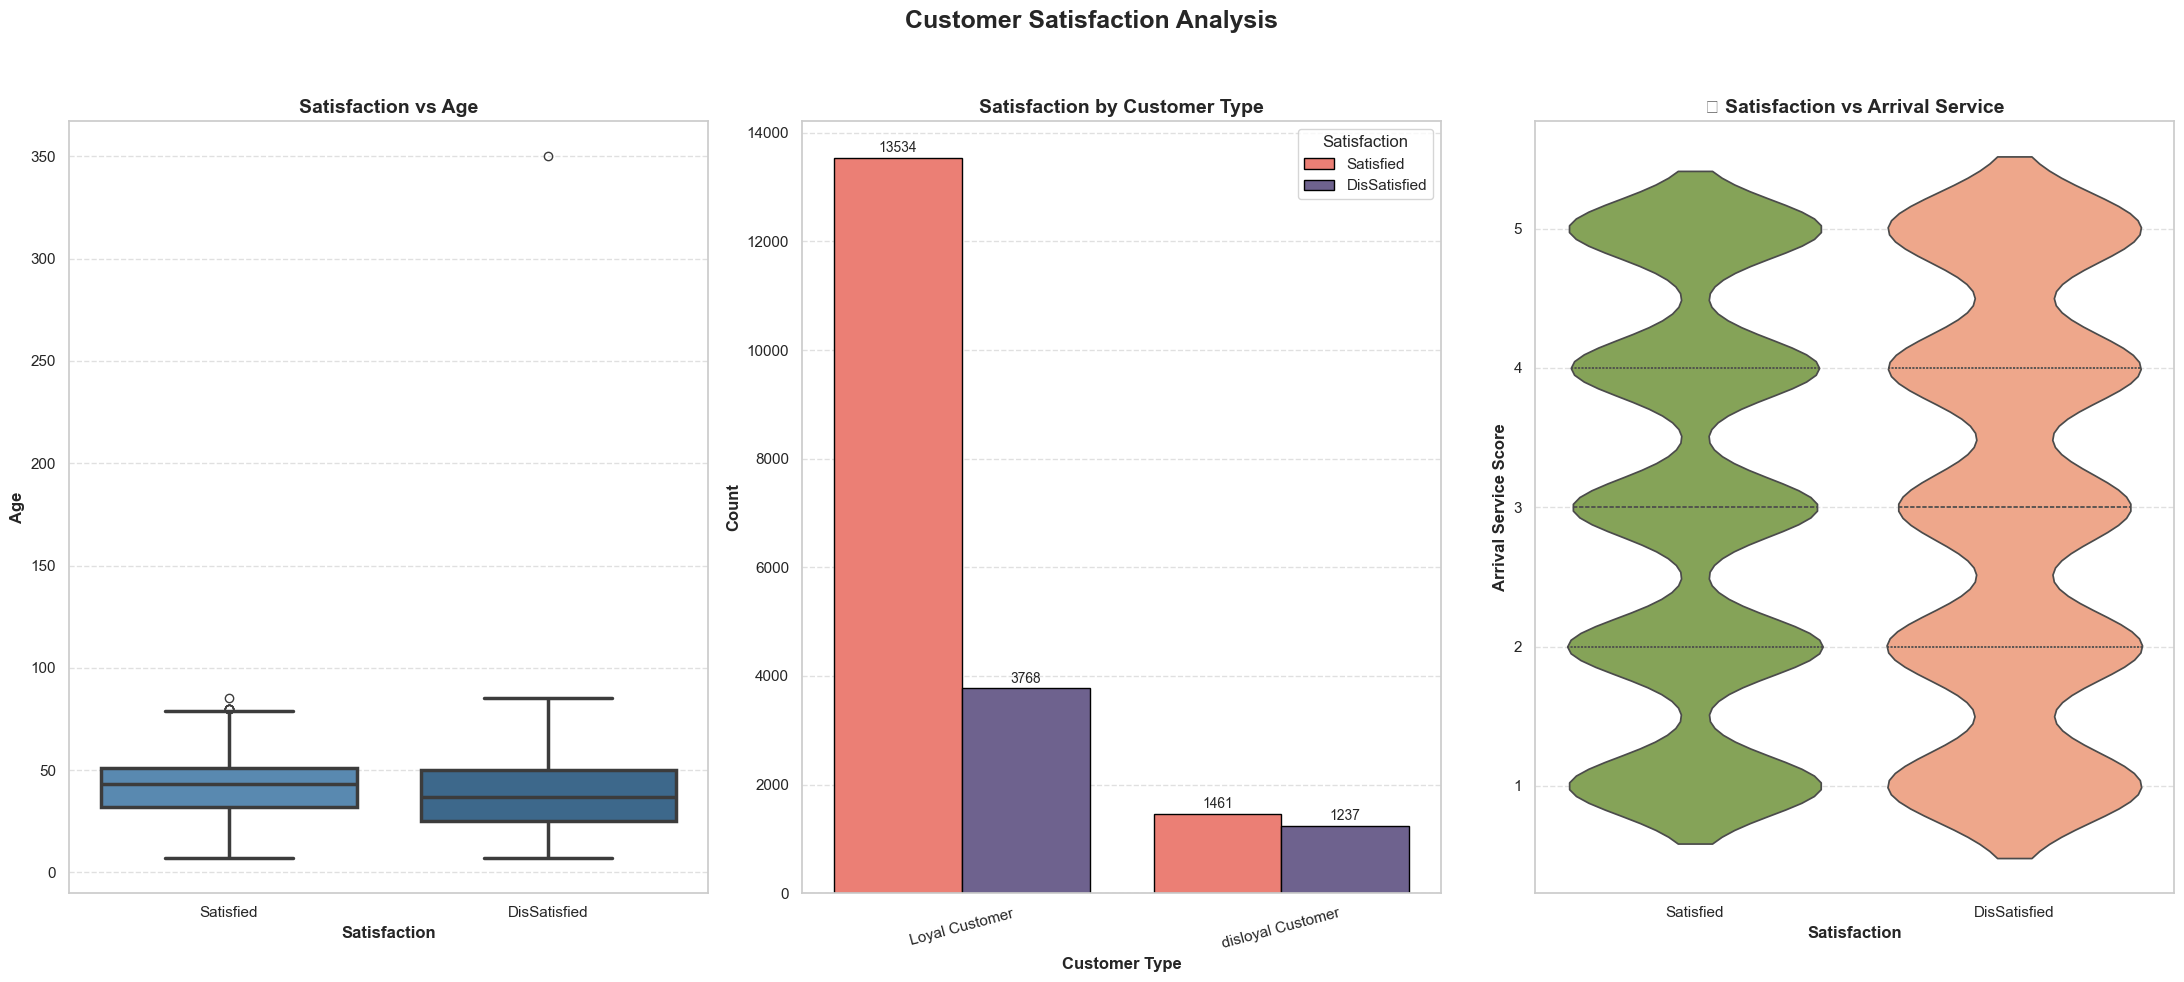

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid", context='notebook')

# Custom color palettes
box_palette = ['#4B8BBE', '#306998']           # Blue shades for boxplot
count_palette = ['#FF6F61', '#6B5B95']         # Red and purple for satisfaction categories
violin_palette = ['#88B04B', '#FFA07A']        # Green and salmon for violin plot

# Create the subplot layout
fig, axes = plt.subplots(1, 3, figsize=(22, 10))
fig.suptitle("Customer Satisfaction Analysis", fontsize=18, fontweight='bold')

# Plot 1: Boxplot - Satisfaction vs Age
sns.boxplot(data=dataset, x='Satisfaction', y='Age', palette=box_palette, linewidth=2.5, ax=axes[0])
axes[0].set_title("Satisfaction vs Age", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Satisfaction", fontsize=12, weight='bold')
axes[0].set_ylabel("Age", fontsize=12, weight='bold')
axes[0].grid(axis='y', linestyle='--', alpha=0.6)

# Plot 2: Countplot - Satisfaction by Customer Type
ax2 = sns.countplot(data=dataset, x='Customer Type', hue='Satisfaction', palette=count_palette, edgecolor='black', ax=axes[1])
axes[1].set_title("Satisfaction by Customer Type", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Customer Type", fontsize=12, weight='bold')
axes[1].set_ylabel("Count", fontsize=12, weight='bold')
axes[1].grid(axis='y', linestyle='--', alpha=0.6)
axes[1].legend(title='Satisfaction', loc='upper right')
axes[1].tick_params(axis='x', rotation=15)

# Annotate values on bars
for container in ax2.containers:
    ax2.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=2)

# Plot 3: Violin Plot - Satisfaction vs Arrival Service
sns.violinplot(data=dataset, x='Satisfaction', y='Arrival Service', palette=violin_palette, inner='quartile', ax=axes[2])
axes[2].set_title("🎻 Satisfaction vs Arrival Service", fontsize=14, fontweight='bold')
axes[2].set_xlabel("Satisfaction", fontsize=12, weight='bold')
axes[2].set_ylabel("Arrival Service Score", fontsize=12, weight='bold')
axes[2].grid(axis='y', linestyle='--', alpha=0.6)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#### Step 6: Grouped Analysis

In [33]:
# Grouping by Satisfaction and summarizing numerical columns
grouped_data = dataset.groupby('Satisfaction').agg({
    'Age': ['mean', 'std', 'min', 'max'],
    'Arrival Service': ['mean', 'std', 'min', 'max'],
    'Booking Services': ['mean', 'std', 'min', 'max'],
    # Add other columns as necessary
})
print(grouped_data)


                    Age                     Arrival Service                    \
                   mean        std min  max            mean       std min max   
Satisfaction                                                                    
DisSatisfied  37.959840  17.004343   7  350        2.997003  1.425821   1   5   
Satisfied     41.754985  12.750088   7   85        2.994732  1.419405   1   5   

             Booking Services                    
                         mean       std min max  
Satisfaction                                     
DisSatisfied         3.031369  1.407562   1   5  
Satisfied            3.024208  1.416763   1   5  


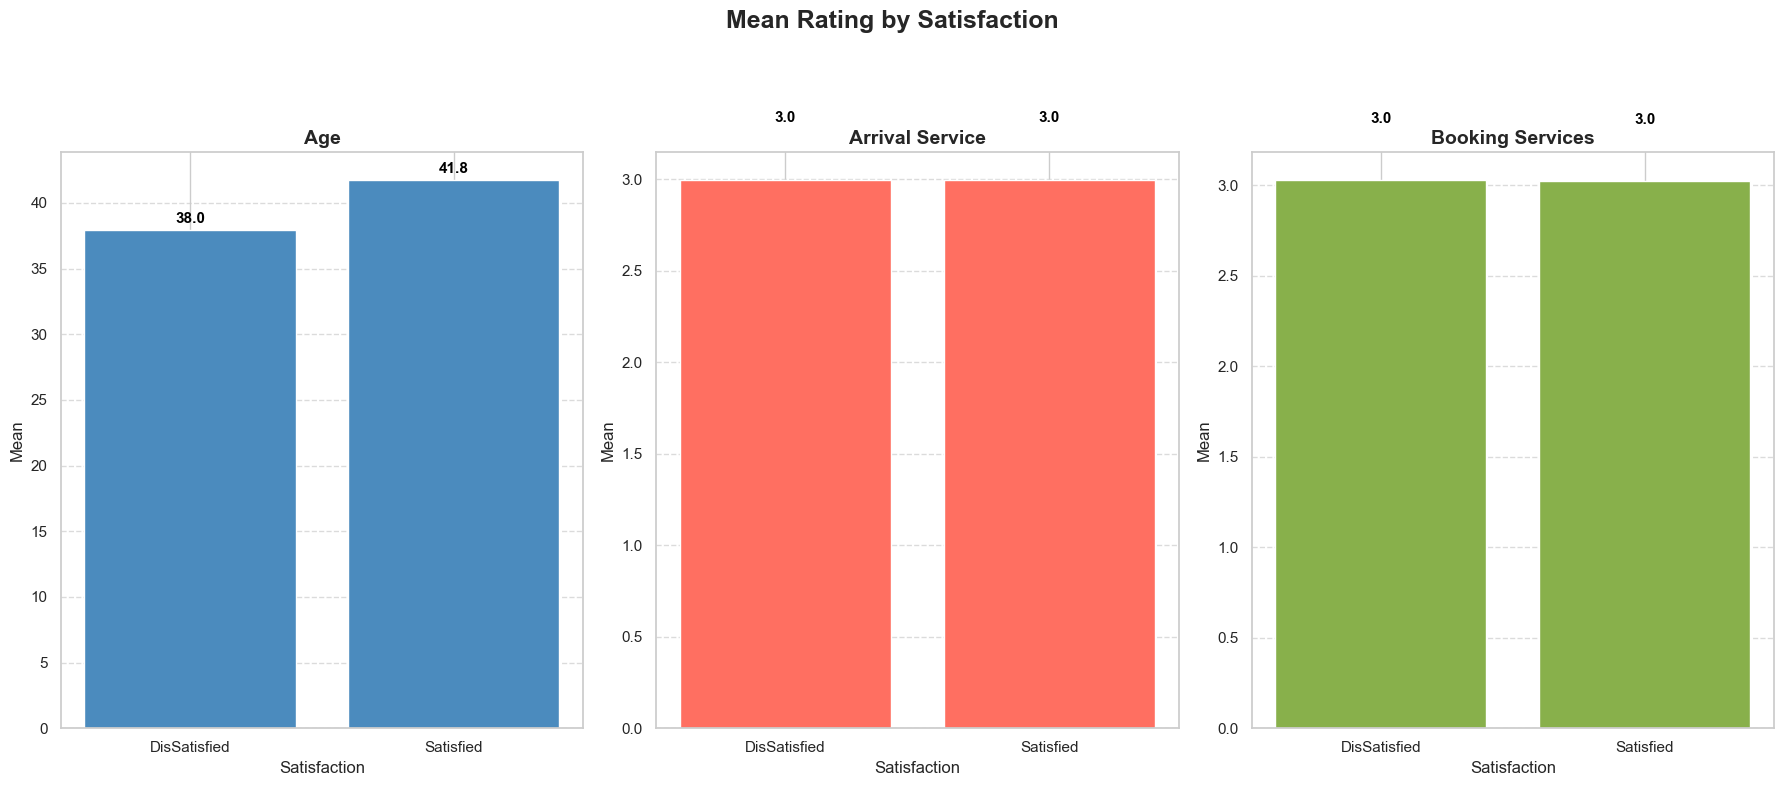

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Grouping and summarizing (mean only)
grouped_data = dataset.groupby('Satisfaction').agg({
    'Age': 'mean',
    'Arrival Service': 'mean',
    'Booking Services': 'mean'
}).reset_index()

# Set Seaborn style
sns.set(style="whitegrid")

# Define color palette
colors = ['#4B8BBE', '#FF6F61', '#88B04B']

# Create subplot layout
fig, axes = plt.subplots(1, 3, figsize=(18, 8))
fig.suptitle("Mean Rating by Satisfaction", fontsize=18, fontweight='bold')

# Plot function with value labels
def plot_mean_only(ax, x, height, color, title):
    bars = ax.bar(x, height, color=color)
    ax.set_title(title, fontsize=14, weight='bold')
    ax.set_ylabel("Mean", fontsize=12)
    ax.set_xlabel("Satisfaction", fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Add value labels
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.3, f"{yval:.1f}",
                ha='center', va='bottom', fontsize=11, fontweight='bold', color='black')

# Plot each
plot_mean_only(axes[0], grouped_data['Satisfaction'], grouped_data['Age'], colors[0], "Age")
plot_mean_only(axes[1], grouped_data['Satisfaction'], grouped_data['Arrival Service'], colors[1], "Arrival Service")
plot_mean_only(axes[2], grouped_data['Satisfaction'], grouped_data['Booking Services'], colors[2], "Booking Services")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

#### Step 7: Checking for Outliers

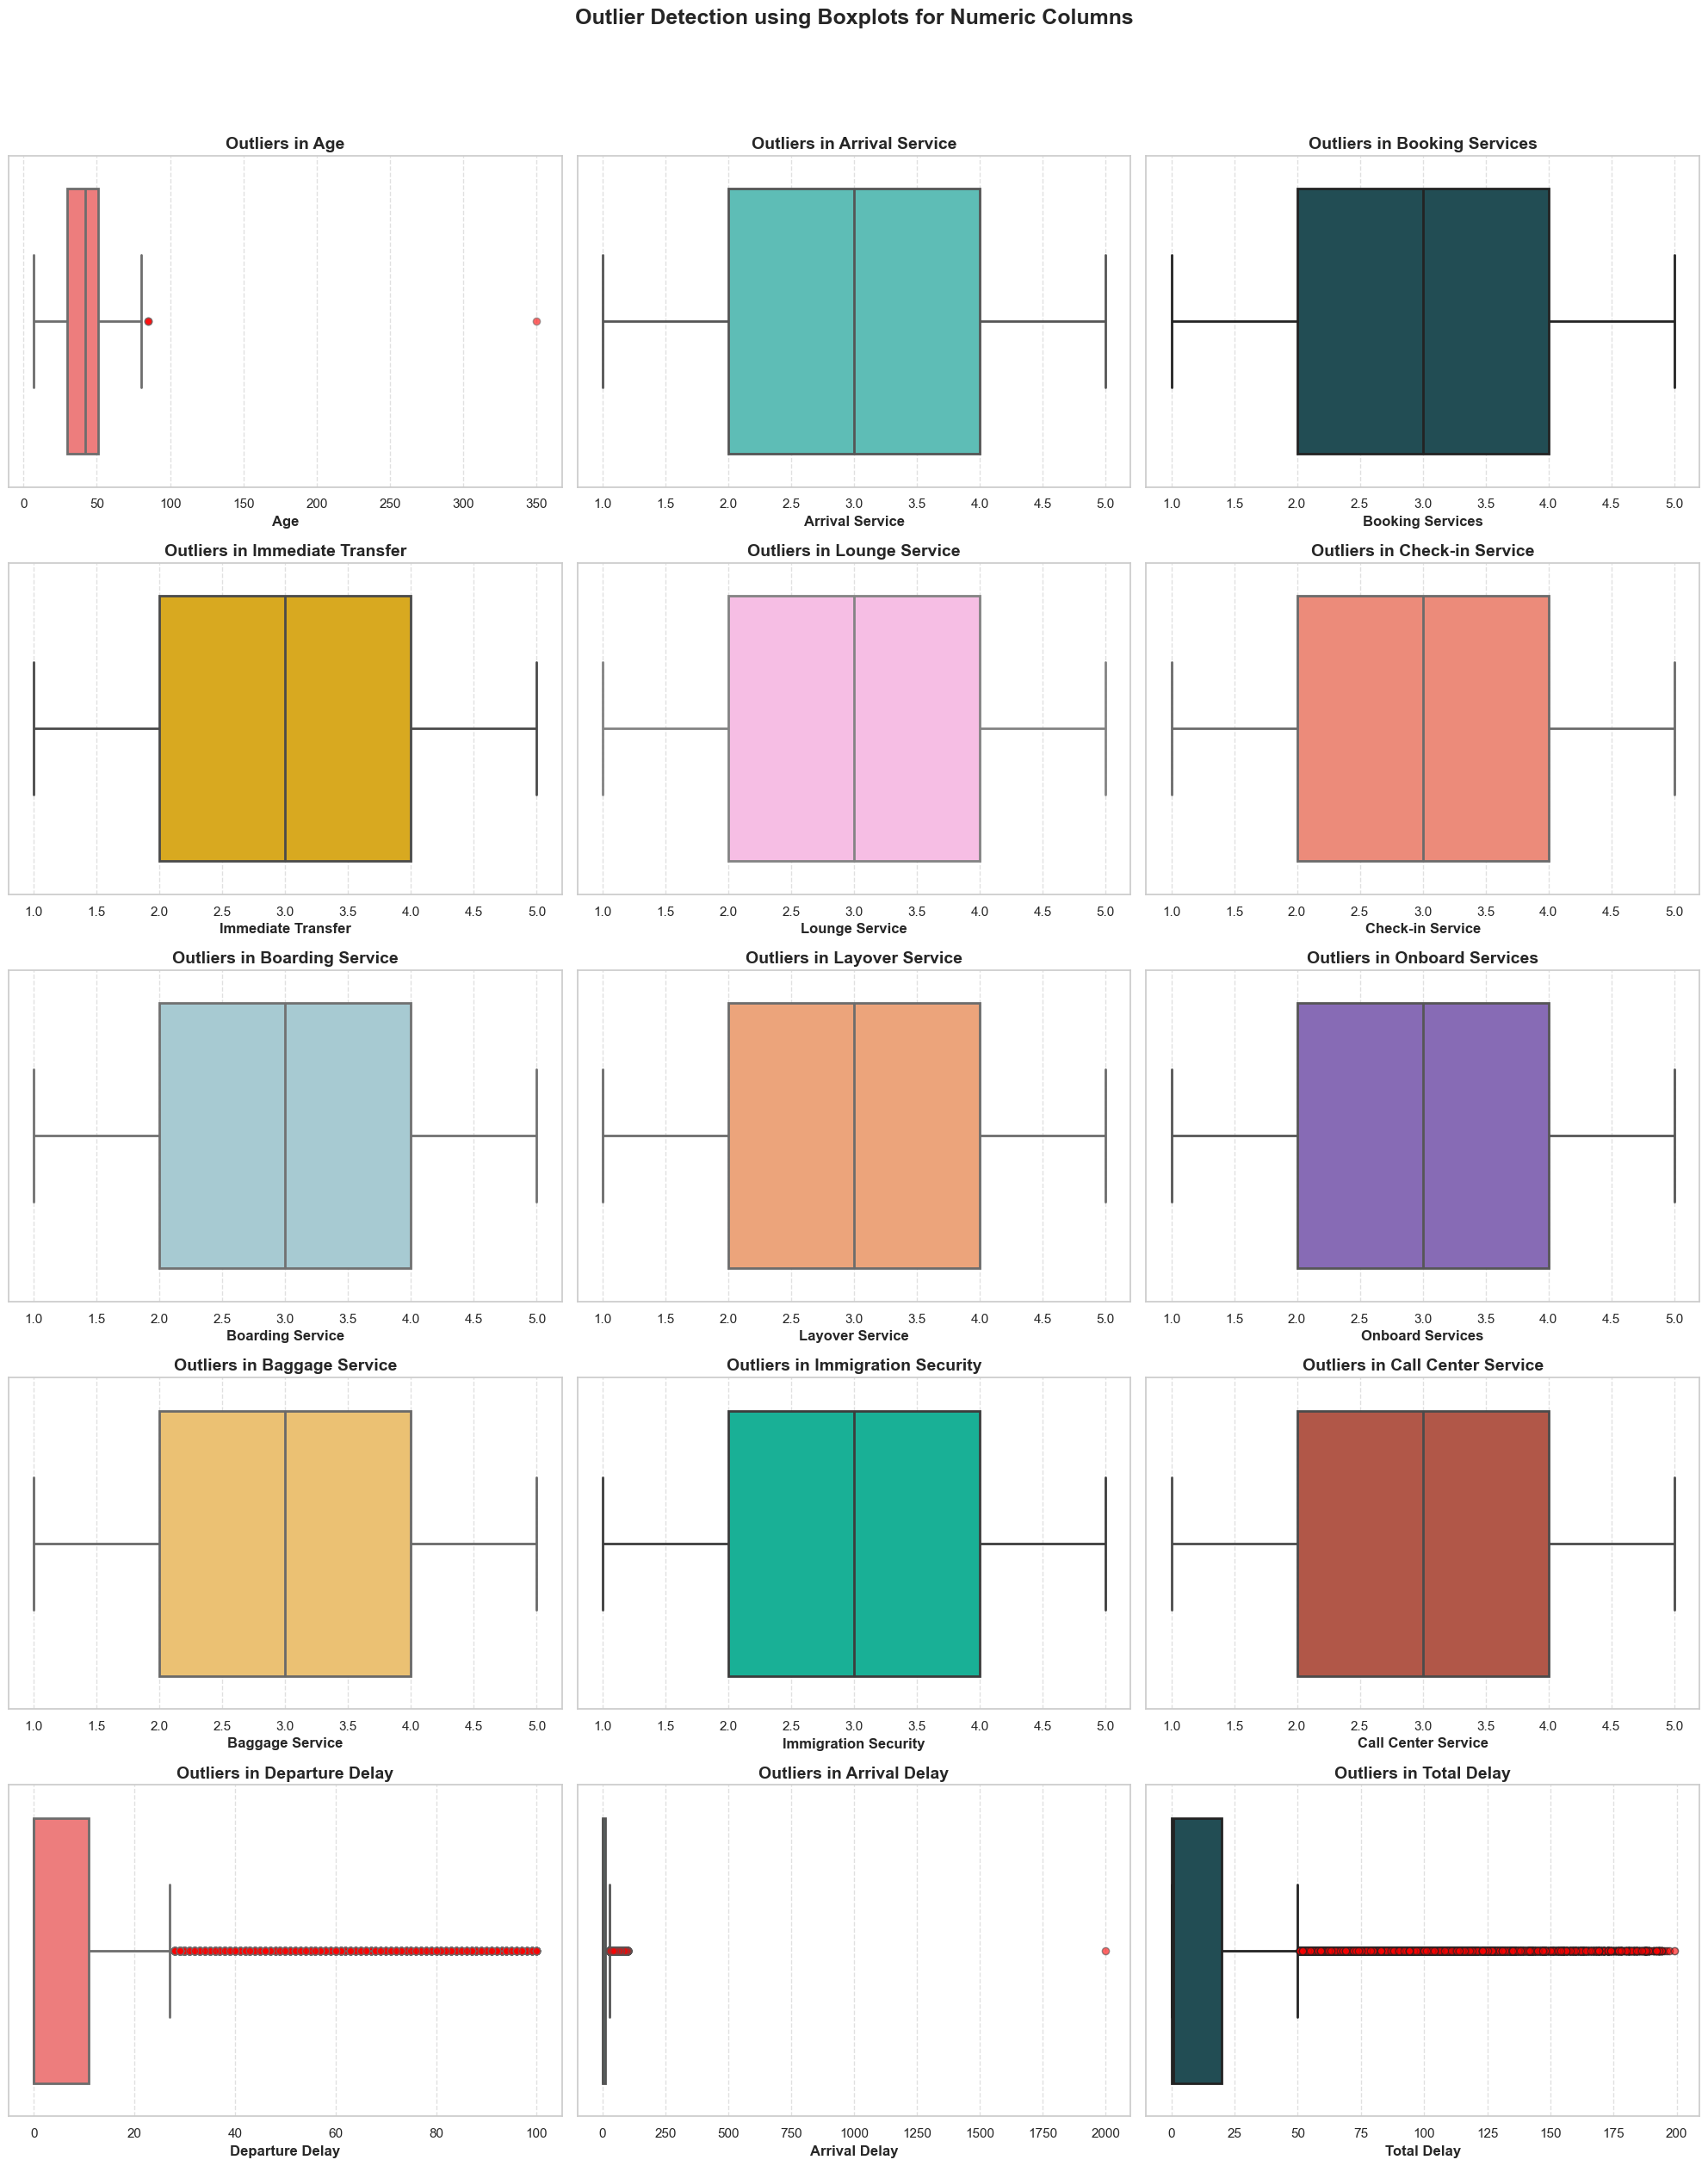

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid", context='notebook')

# Define flier (outlier) properties
flier_props = dict(marker='o', markerfacecolor='red', markersize=6, linestyle='none', alpha=0.6)

# Select only numeric columns from the dataset
numeric_columns = dataset.select_dtypes(include=['float64', 'int64']).columns

# Define a custom color palette
custom_colors = ['#FF6B6B', '#4ECDC4', '#1A535C', '#F7B801', '#FFB5E8', '#FF7E67', 
                 '#A0CED9', '#FF9F68', '#845EC2', '#FFC75F', '#00C9A7', '#C34A36']

# Set the number of rows and columns for subplots
n_cols = 3
n_rows = (len(numeric_columns) // n_cols) + 1

# Set figure size and layout
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
fig.suptitle("Outlier Detection using Boxplots for Numeric Columns", fontsize=18, fontweight='bold')

# Flatten axes array for easy iteration
axes = axes.flatten()

# Loop through numeric columns and create boxplots
for i, column in enumerate(numeric_columns):
    color = custom_colors[i % len(custom_colors)]  # Cycle through custom colors
    sns.boxplot(data=dataset, x=column, color=color, flierprops=flier_props, linewidth=2, ax=axes[i])
    axes[i].set_title(f"Outliers in {column}", fontsize=14, fontweight='bold')
    axes[i].set_xlabel(column, fontsize=12, weight='bold')
    axes[i].grid(axis='x', linestyle='--', alpha=0.6)

# Remove empty axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#### Handdling Outliers

In [36]:
import numpy as np
import pandas as pd

# Copy the dataset to avoid modifying the original directly
df = dataset.copy()

# Columns to handle
outlier_columns = ['Age', 'Arrival Delay']

# Function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Print detected outliers count
for col in outlier_columns:
    outliers = detect_outliers_iqr(df, col)
    print(f"{col}: {len(outliers)} outliers detected.")

# Apply log transformation (log1p to handle zero and negative values safely)
for col in outlier_columns:
    df[f'{col}_log'] = np.log1p(df[col])

# Drop original columns (optional, depending on your modeling choice)
# df.drop(columns=outlier_columns, inplace=True)

# Update dataset with transformed version
dataset = df

Age: 4 outliers detected.
Arrival Delay: 2669 outliers detected.


#### Encoding categorical variables

In [37]:
import pandas as pd

# Categorical columns to encode (including Satisfaction)
categorical_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Satisfaction']

# Apply one-hot encoding and drop the first category to avoid multicollinearity
dataset = pd.get_dummies(dataset, columns=categorical_cols, drop_first=True)

# Save the preprocessed dataset to a new CSV file
dataset.to_csv('Preprocessed_Dataset.csv', index=False)



#### Step 8: Feature Engineering

In [38]:
# Example: Create a new feature for total delay
dataset['Total Delay'] = dataset['Departure Delay'] + dataset['Arrival Delay']

# Check the new feature
dataset['Total Delay'].head()


0       0.0
1    2020.0
2       0.0
3       0.0
4       0.0
Name: Total Delay, dtype: float64

#### Distribution of Ratings (1 to 5) for Customer Service Aspects

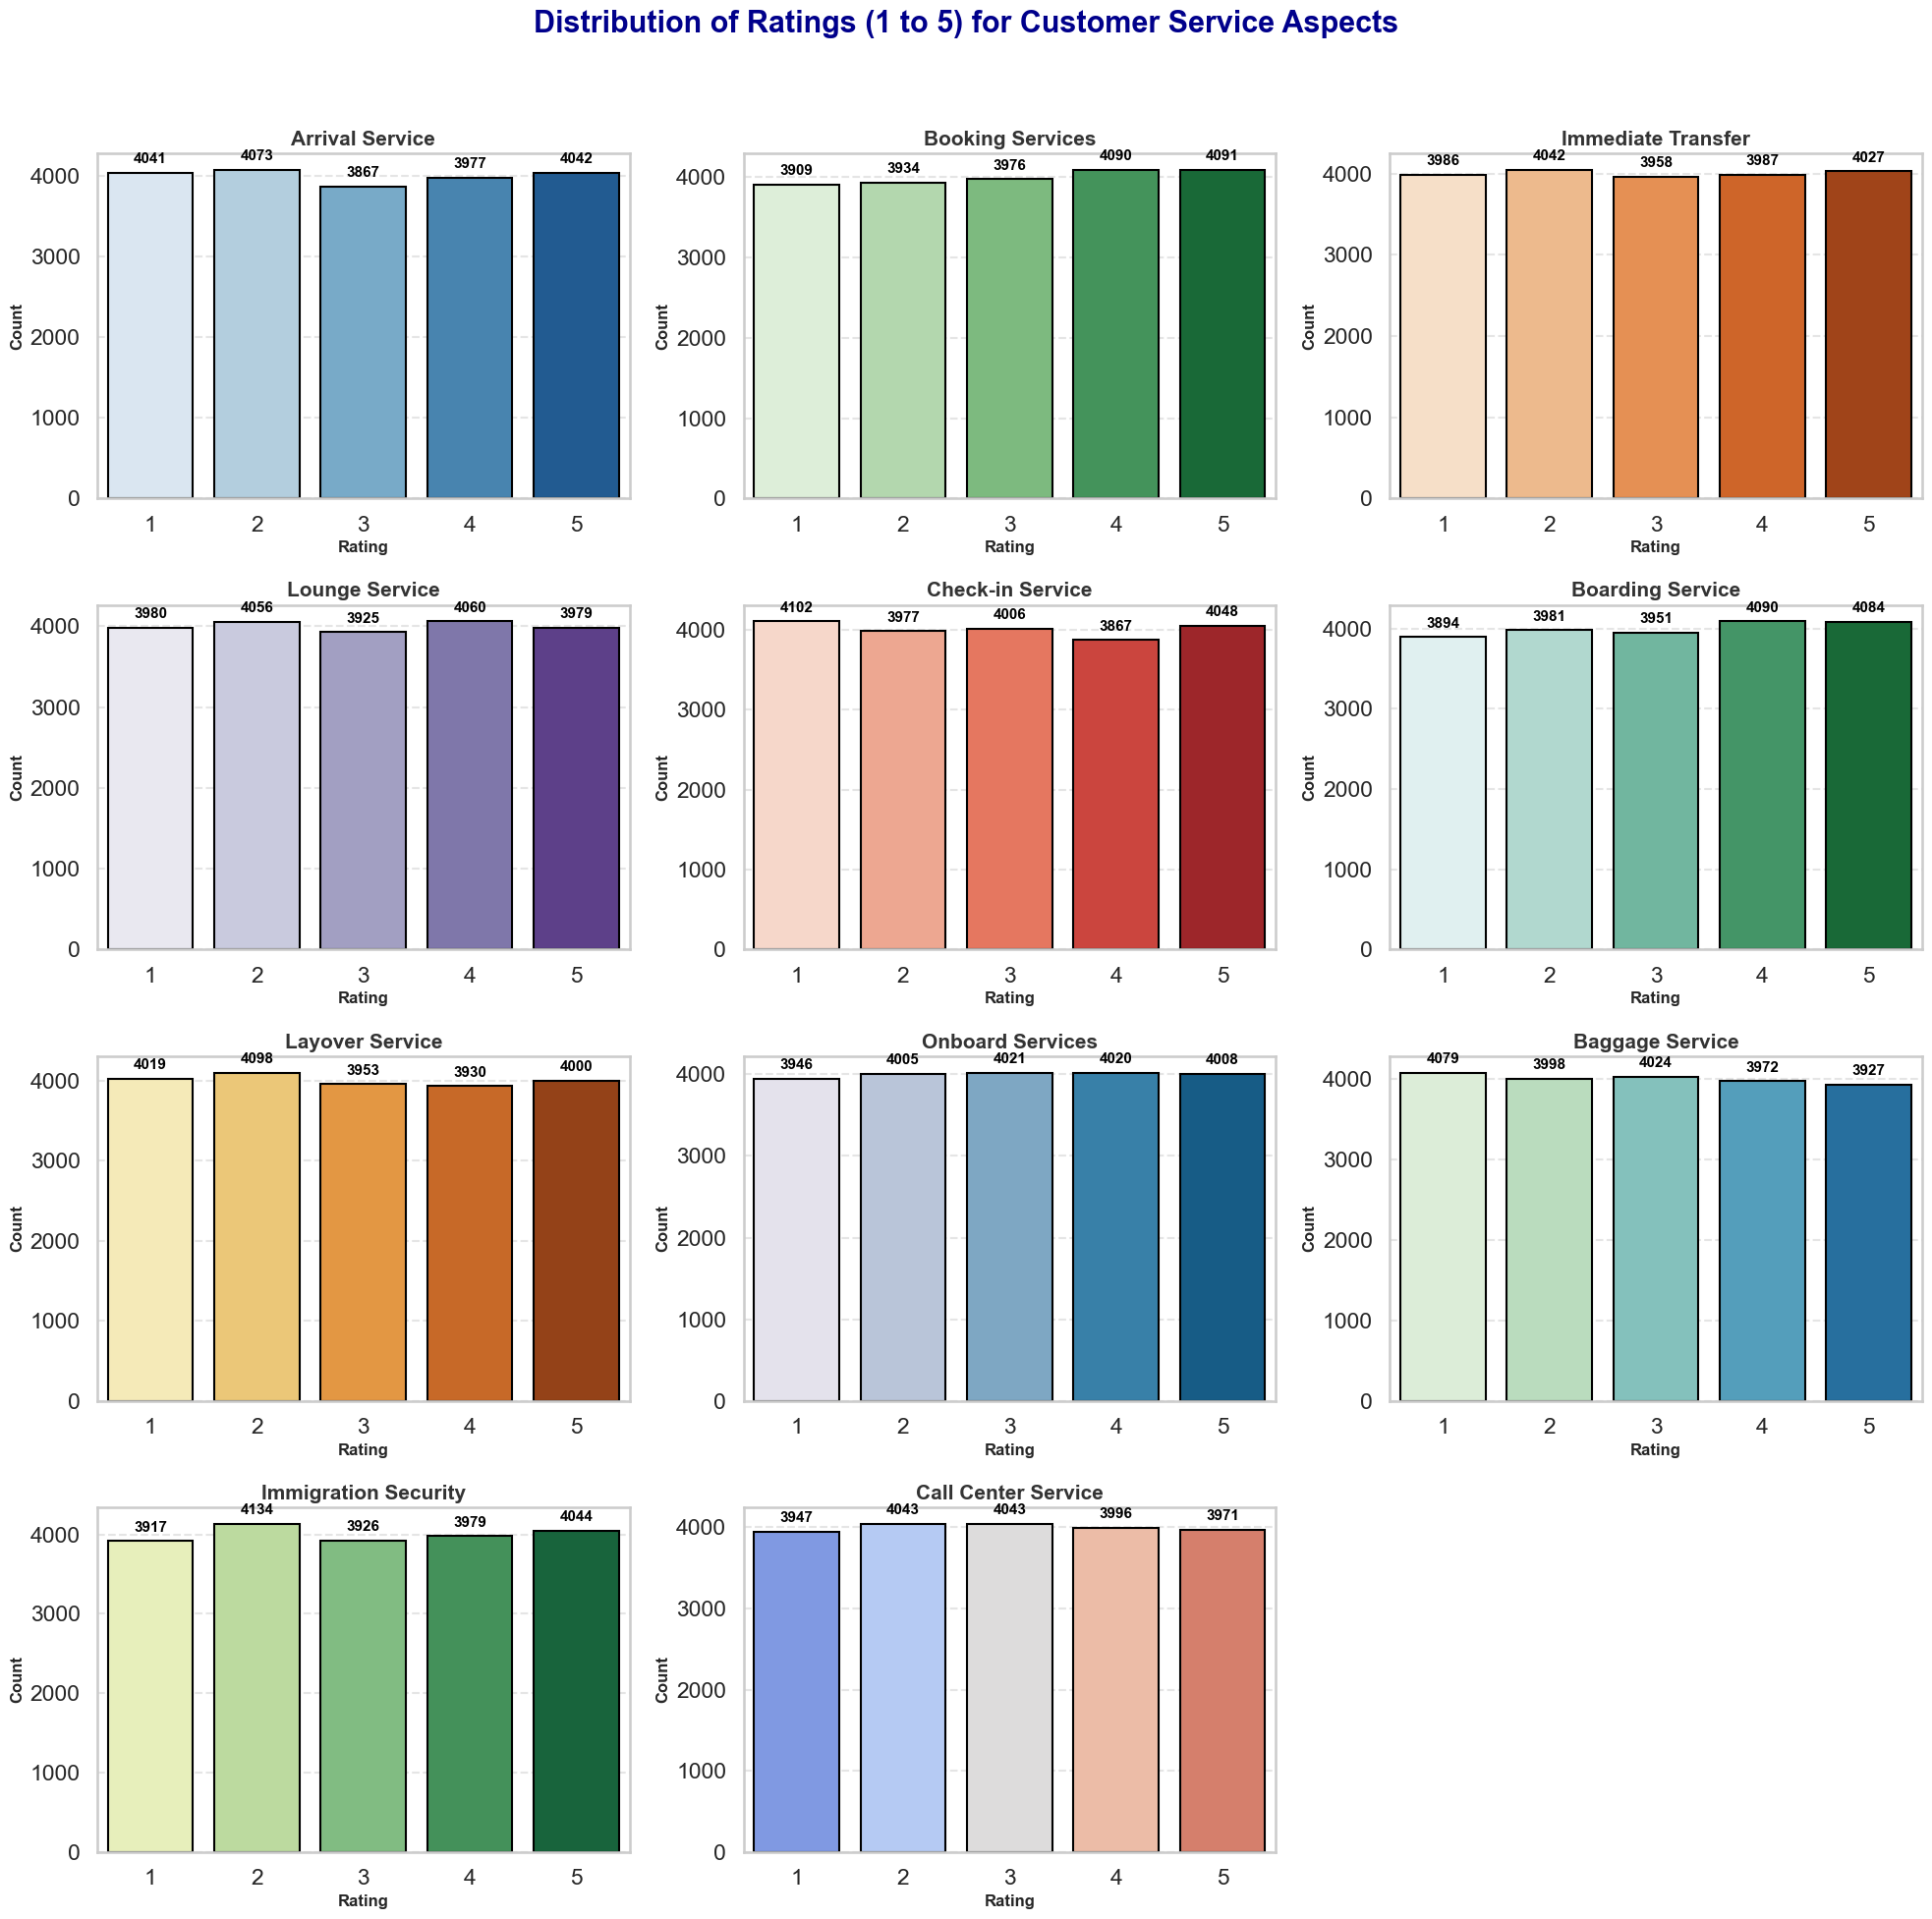

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style and context
sns.set(style="whitegrid", context='talk')

# List of service columns
service_columns = [
    'Arrival Service', 'Booking Services', 'Immediate Transfer', 'Lounge Service',
    'Check-in Service', 'Boarding Service', 'Layover Service', 'Onboard Services',
    'Baggage Service', 'Immigration Security', 'Call Center Service'
]

# Define unique color palettes to rotate
palettes = [
    "Blues", "Greens", "Oranges", "Purples", "Reds", 
    "BuGn", "YlOrBr", "PuBu", "GnBu", "YlGn", "coolwarm"
]

# Set subplot layout
n_cols = 3
n_rows = (len(service_columns) // n_cols) + 1
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
fig.suptitle("Distribution of Ratings (1 to 5) for Customer Service Aspects", 
             fontsize=22, fontweight='bold', color='darkblue')

# Flatten axes for iteration
axes = axes.flatten()

# Create bar plots with unique palettes
for i, col in enumerate(service_columns):
    value_counts = dataset[col].value_counts().sort_index()
    sns.barplot(x=value_counts.index, y=value_counts.values, palette=palettes[i % len(palettes)], 
                ax=axes[i], edgecolor="black")
    
    axes[i].set_title(f"{col}", fontsize=15, fontweight='bold', color='#333333')
    axes[i].set_xlabel("Rating", fontsize=12, weight='bold')
    axes[i].set_ylabel("Count", fontsize=12, weight='bold')
    axes[i].grid(axis='y', linestyle='--', alpha=0.5)
    
    for j, val in enumerate(value_counts.values):
        axes[i].text(j, val + max(value_counts.values)*0.02, str(val), ha='center', va='bottom',
                     fontsize=11, color='black', fontweight='bold')

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Layout adjustment
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


#### Average Customer Ratings per Service Aspect

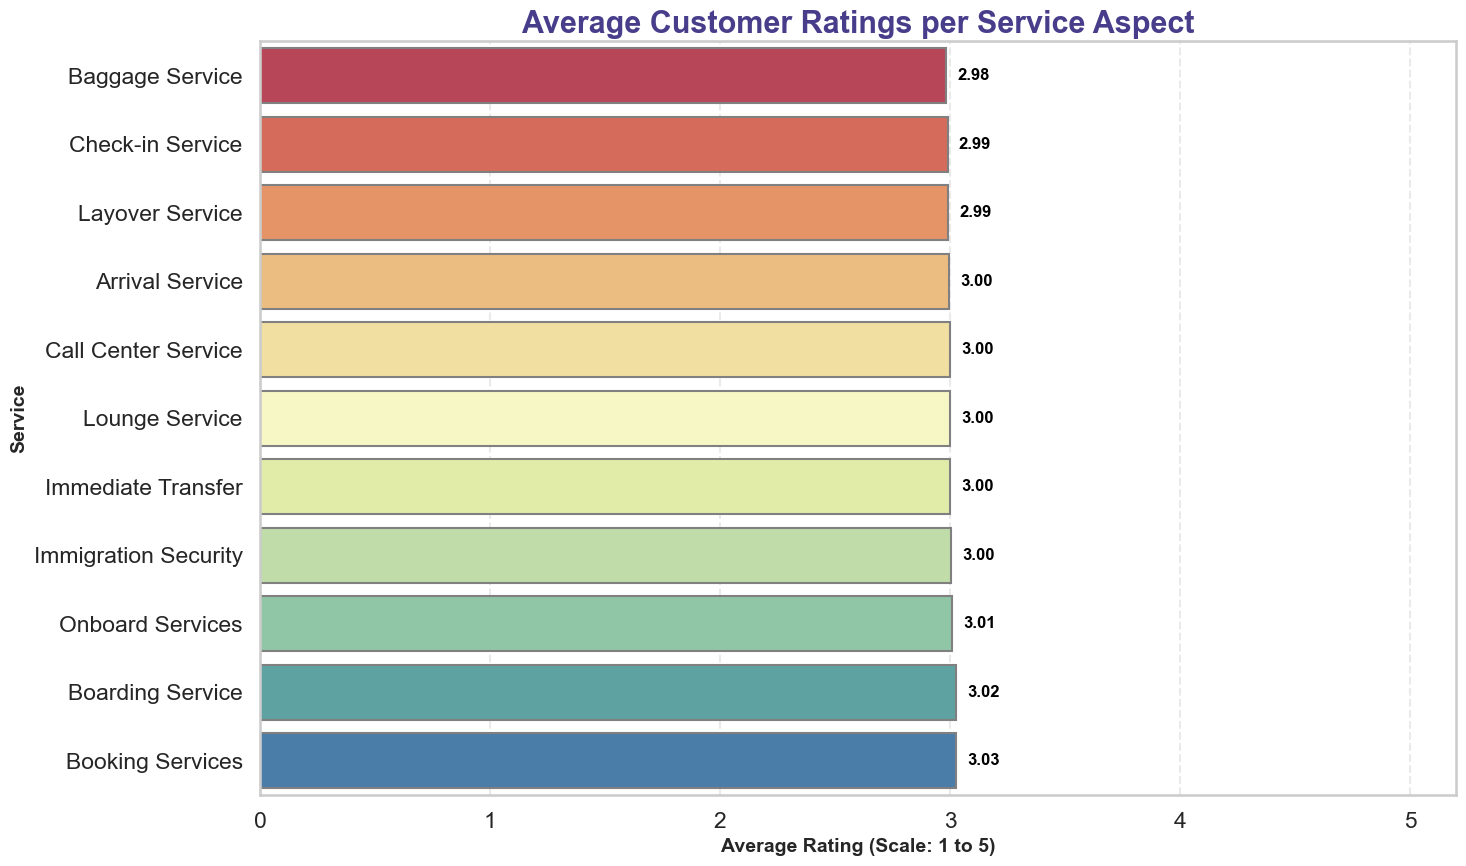

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid", context='talk')

# Service columns
service_columns = [
    'Arrival Service', 'Booking Services', 'Immediate Transfer', 'Lounge Service',
    'Check-in Service', 'Boarding Service', 'Layover Service', 'Onboard Services',
    'Baggage Service', 'Immigration Security', 'Call Center Service'
]

# Compute average ratings
average_ratings = dataset[service_columns].mean().sort_values(ascending=True)  # bottom-up for aesthetics

# Plot settings
plt.figure(figsize=(15, 9))
bar_colors = sns.color_palette("Spectral", len(average_ratings))

# Horizontal barplot
bars = sns.barplot(x=average_ratings.values, y=average_ratings.index, palette=bar_colors, linewidth=1.5, edgecolor='gray')

# Plot title and labels
plt.title("Average Customer Ratings per Service Aspect", fontsize=22, fontweight='bold', color='darkslateblue')
plt.xlabel("Average Rating (Scale: 1 to 5)", fontsize=14, weight='bold')
plt.ylabel("Service", fontsize=14, weight='bold')
plt.xlim(0, 5.2)

# Add rating labels on bars
for i, (value, name) in enumerate(zip(average_ratings.values, average_ratings.index)):
    plt.text(value + 0.05, i, f"{value:.2f}", va='center', fontsize=12, fontweight='bold', color='black')

# Light grid and layout
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

#### Data type Conversion

In [41]:
# Convert IDs to string
#dataset['Customer ID'] = dataset['Customer ID'].astype(str)

# Convert categorical columns
categorical_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Satisfaction']
#dataset[categorical_cols] = dataset[categorical_cols].astype('category')

# Convert rating columns to integer (1-5 scale)
rating_cols = [
    'Arrival Service', 'Booking Services', 'Immediate Transfer', 'Lounge Service',
    'Check-in Service', 'Boarding Service', 'Layover Service', 'Onboard Services',
    'Baggage Service', 'Immigration Security', 'Call Center Service'
]
dataset[rating_cols] = dataset[rating_cols].astype(int)

# Convert delay and age columns to numeric (handling missing/non-numeric gracefully)
numeric_cols = ['Age', 'Departure Delay', 'Arrival Delay', 'Total Delay']
for col in numeric_cols:
    dataset[col] = pd.to_numeric(dataset[col], errors='coerce')

dataset.to_csv("cleaned_dataset.csv", index=False)



#### Feature Scaling

In [42]:
from sklearn.preprocessing import StandardScaler

# Select the numeric features to scale
numeric_features = [
    'Age', 'Total Delay', 'Departure Delay', 'Arrival Delay', 
    'Arrival Service', 'Booking Services', 'Immediate Transfer',
    'Lounge Service', 'Check-in Service', 'Boarding Service',
    'Layover Service', 'Onboard Services', 'Baggage Service',
    'Immigration Security', 'Call Center Service'
]

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply standardization and store back into dataset
dataset[numeric_features] = scaler.fit_transform(dataset[numeric_features])

# Verify scaling
dataset[numeric_features].describe().round(2)

# Save the updated dataset to a new CSV file
dataset.to_csv('scaled_dataset.csv', index=False)

#### Feature Selection

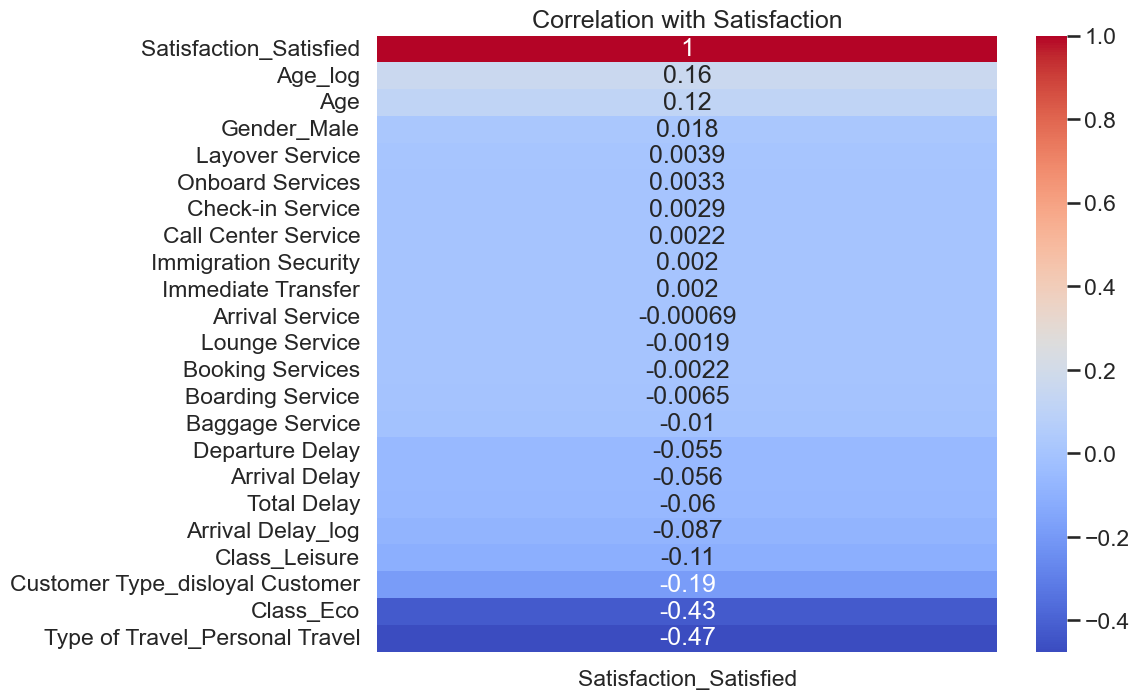

In [45]:
# Step 1: Correlation Matrix (for numerical features)
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
dataset2 = pd.read_csv('scaled_dataset.csv')

# Correlation matrix for numerical features with Satisfaction
correlation_matrix = dataset2.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix[['Satisfaction_Satisfied']].sort_values(by='Satisfaction_Satisfied', ascending=False),
            annot=True, cmap='coolwarm')
plt.title('Correlation with Satisfaction')
plt.show()

In [46]:
# Get absolute correlations with the target
correlation_target = correlation_matrix['Satisfaction_Satisfied'].abs()

# Drop the target column itself
correlation_target = correlation_target.drop('Satisfaction_Satisfied')

# Select the top 8 features
top_8_features = correlation_target.sort_values(ascending=False).head(8)
print("Top 8 correlated features with Satisfaction_Satisfied:")
print(top_8_features)

# Optionally: store selected features in a list
selected_features = top_8_features.index.tolist()


Top 8 correlated features with Satisfaction_Satisfied:
Type of Travel_Personal Travel     0.474572
Class_Eco                          0.426266
Customer Type_disloyal Customer    0.189840
Age_log                            0.160519
Age                                0.117146
Class_Leisure                      0.109300
Arrival Delay_log                  0.087056
Total Delay                        0.060422
Name: Satisfaction_Satisfied, dtype: float64


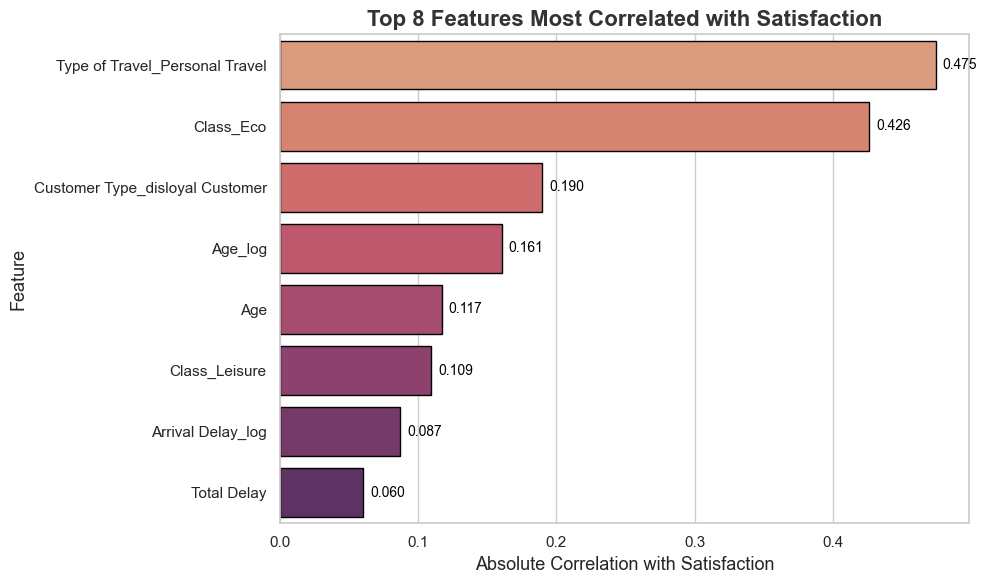

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Top 8 Correlated Features
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

barplot = sns.barplot(
    x=top_8_features.values,
    y=top_8_features.index,
    palette="flare",
    edgecolor='black'
)

plt.title('Top 8 Features Most Correlated with Satisfaction', fontsize=16, weight='bold', color='#333333')
plt.xlabel('Absolute Correlation with Satisfaction', fontsize=13)
plt.ylabel('Feature', fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Annotate correlation values
for i, v in enumerate(top_8_features.values):
    barplot.text(v + 0.005, i, f"{v:.3f}", color='black', va='center', fontsize=10)

plt.tight_layout()
plt.show()


#### Step 2: Mutual Information (for both categorical and numeric)

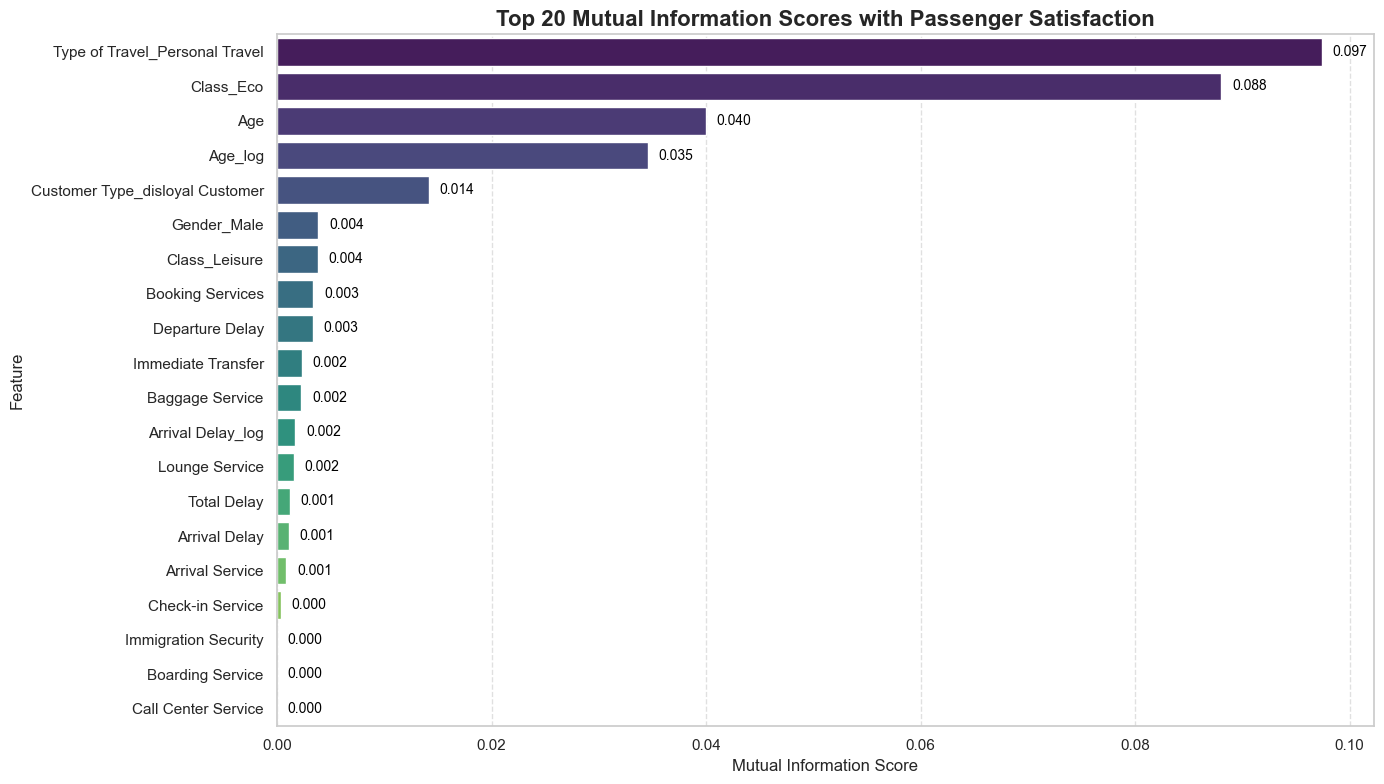

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
#handle warnings
import warnings
warnings.filterwarnings('ignore')
# Prepare data
X = dataset2.drop(columns=['Satisfaction_Satisfied'])
y = dataset2['Satisfaction_Satisfied']
X_encoded = pd.get_dummies(X, drop_first=True)

# Compute Mutual Information Scores
mi_scores = mutual_info_classif(X_encoded, y, random_state=0)
mi_df = pd.DataFrame({'Feature': X_encoded.columns, 'MI Score': mi_scores})
mi_df = mi_df.sort_values('MI Score', ascending=False)

# Plot: Top 20 MI Features
plt.figure(figsize=(14, 8))
barplot = sns.barplot(
    data=mi_df.head(20),
    x='MI Score',
    y='Feature',
    palette='viridis'
)
plt.title('Top 20 Mutual Information Scores with Passenger Satisfaction', fontsize=16, weight='bold')
plt.xlabel('Mutual Information Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Add value labels to bars
for i, v in enumerate(mi_df.head(20)['MI Score']):
    barplot.text(v + 0.001, i, f"{v:.3f}", color='black', va='center', fontsize=10)

plt.tight_layout()
plt.show()



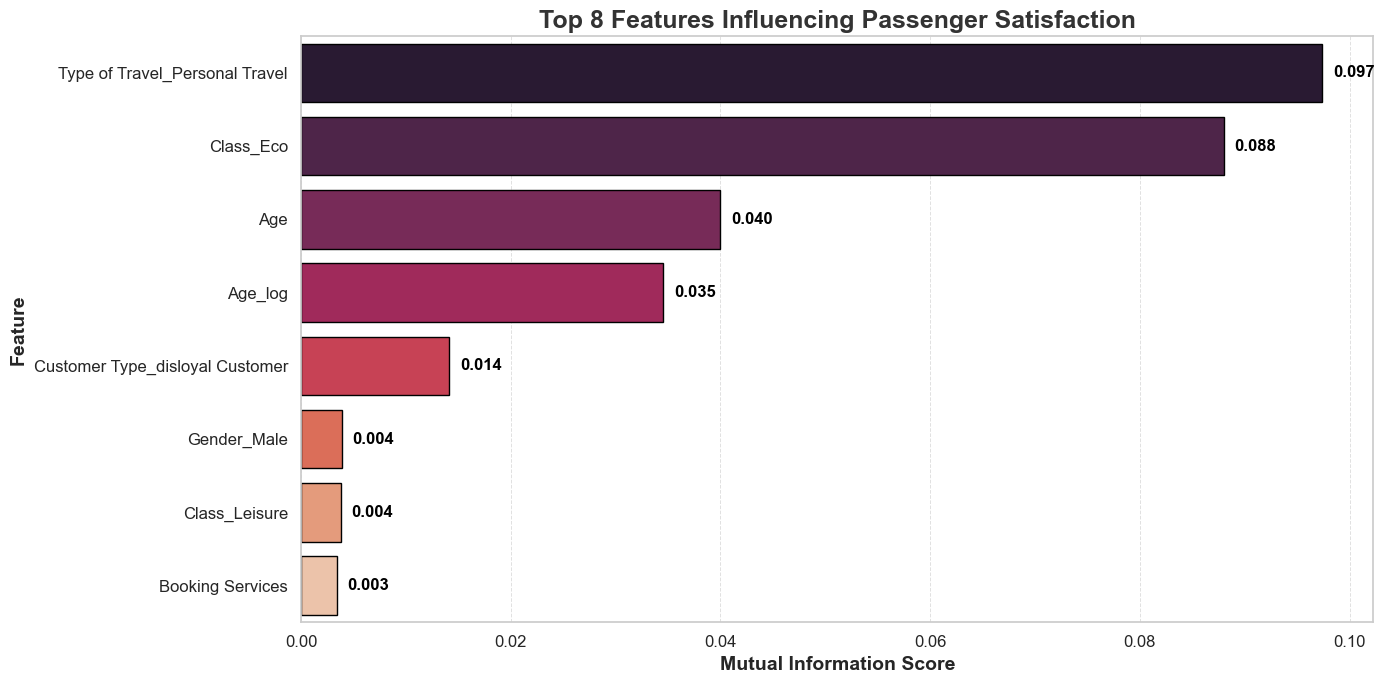

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
#handle warnings
import warnings 
warnings.filterwarnings('ignore')
# Prepare data
X = dataset2.drop(columns=['Satisfaction_Satisfied'])
y = dataset2['Satisfaction_Satisfied']
X_encoded = pd.get_dummies(X, drop_first=True)

# Compute Mutual Information Scores
mi_scores = mutual_info_classif(X_encoded, y, random_state=0)
mi_df = pd.DataFrame({'Feature': X_encoded.columns, 'MI Score': mi_scores})
mi_df = mi_df.sort_values('MI Score', ascending=False)

# Select top 8 features
top_8_features = mi_df.head(8)

# Set style
sns.set(style="whitegrid")
plt.figure(figsize=(14, 7))

# Custom color palette
colors = sns.color_palette("rocket", len(top_8_features))

# Plot
barplot = sns.barplot(
    data=top_8_features,
    x='MI Score',
    y='Feature',
    palette=colors,
    edgecolor='black'
)

# Titles and labels
plt.title('Top 8 Features Influencing Passenger Satisfaction', fontsize=18, weight='bold', color='#333333')
plt.xlabel('Mutual Information Score', fontsize=14, weight='bold')
plt.ylabel('Feature', fontsize=14, weight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', linewidth=0.7, alpha=0.6)

# Annotate bars
for i, v in enumerate(top_8_features['MI Score']):
    barplot.text(v + 0.001, i, f"{v:.3f}", color='black', va='center', fontsize=12, weight='bold')

plt.tight_layout()
plt.show()



#### Step 3: Feature Importance using Random Forest

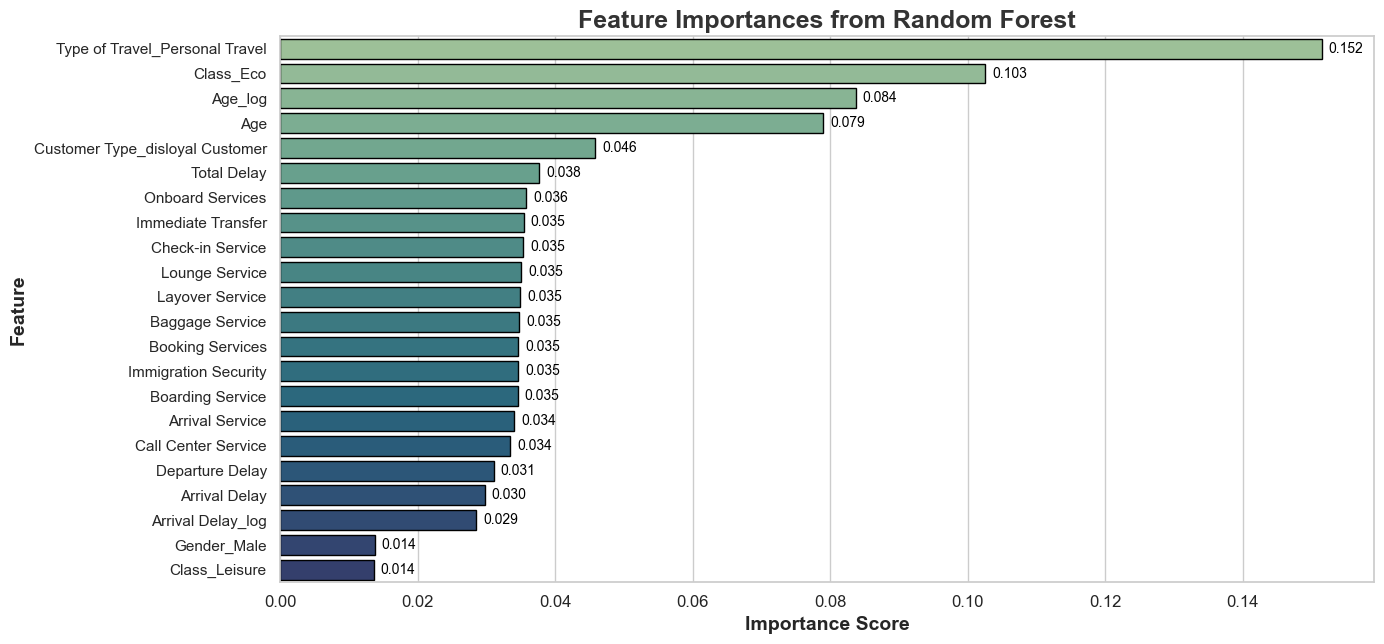

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

#handle warnings
import warnings
warnings.filterwarnings('ignore')

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_encoded, y)

# Get feature importances
importances = pd.Series(rf.feature_importances_, index=X_encoded.columns).sort_values(ascending=False)  # sort ascending for horizontal bar

# Plot all features
plt.figure(figsize=(14, max(6, 0.3 * len(importances))))  # dynamic height
sns.set(style="whitegrid")

barplot = sns.barplot(
    x=importances,
    y=importances.index,
    palette="crest",
    edgecolor='black'
)

plt.title('Feature Importances from Random Forest', fontsize=18, weight='bold', color='#333333')
plt.xlabel('Importance Score', fontsize=14, weight='bold')
plt.ylabel('Feature', fontsize=14, weight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=11)

# Annotate scores
for i, v in enumerate(importances):
    barplot.text(v + 0.001, i, f"{v:.3f}", color='black', va='center', fontsize=10)

plt.tight_layout()
plt.show()



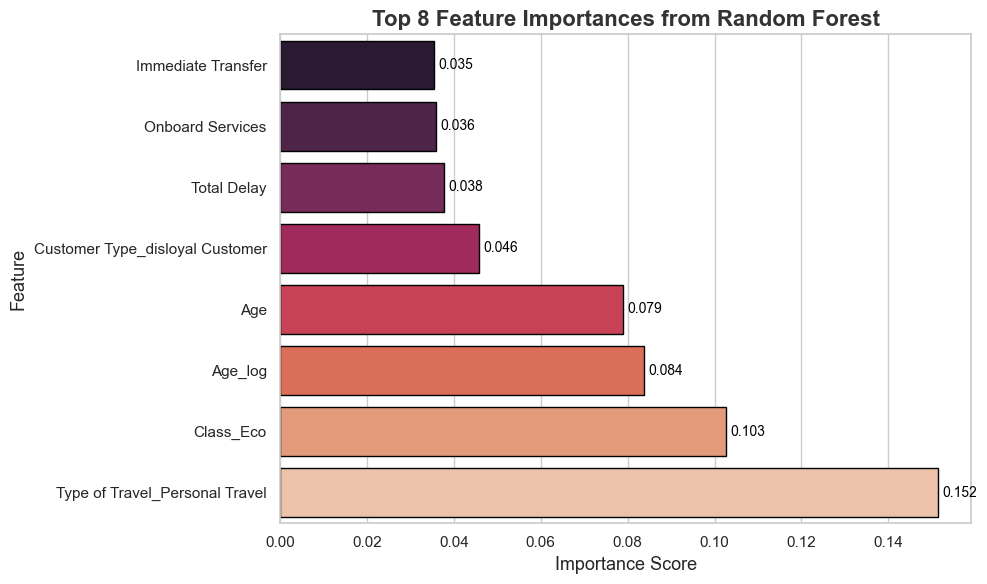

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
#handle warnings
import warnings 
warnings.filterwarnings('ignore')

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_encoded, y)

# Get feature importances and select top 8
importances = pd.Series(rf.feature_importances_, index=X_encoded.columns).sort_values(ascending=True)
top_8 = importances.tail(8)

# Plot top 8 features
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

barplot = sns.barplot(
    x=top_8,
    y=top_8.index,
    palette="rocket",
    edgecolor='black'
)

plt.title('Top 8 Feature Importances from Random Forest', fontsize=16, weight='bold', color='#333333')
plt.xlabel('Importance Score', fontsize=13)
plt.ylabel('Feature', fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Annotate values
for i, v in enumerate(top_8):
    barplot.text(v + 0.001, i, f"{v:.3f}", color='black', va='center', fontsize=10)

plt.tight_layout()
plt.show()


#### Top 10 Selected Features 

In [52]:
from tabulate import tabulate
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier

# Load dataset
dataset = pd.read_csv('scaled_dataset.csv')
X = dataset.drop(columns=['Satisfaction_Satisfied'])
y = dataset['Satisfaction_Satisfied']
X_encoded = pd.get_dummies(X, drop_first=True)

# 1. Correlation
correlation_matrix = dataset.corr(numeric_only=True)
correlation_scores = correlation_matrix['Satisfaction_Satisfied'].drop('Satisfaction_Satisfied').abs()
correlation_df = correlation_scores.rename('Correlation').reset_index().rename(columns={'index': 'Feature'})

# 2. Mutual Information
mi_scores = mutual_info_classif(X_encoded, y, random_state=0)
mi_df = pd.DataFrame({'Feature': X_encoded.columns, 'Mutual_Info': mi_scores})

# 3. Random Forest Importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_encoded, y)
rf_scores = pd.DataFrame({'Feature': X_encoded.columns, 'RF_Importance': rf.feature_importances_})

# Merge all metrics
all_scores = correlation_df.merge(mi_df, on='Feature').merge(rf_scores, on='Feature')

# Ranking
all_scores['Corr_Rank'] = all_scores['Correlation'].rank(ascending=False)
all_scores['MI_Rank'] = all_scores['Mutual_Info'].rank(ascending=False)
all_scores['RF_Rank'] = all_scores['RF_Importance'].rank(ascending=False)
all_scores['Avg_Rank'] = all_scores[['Corr_Rank', 'MI_Rank', 'RF_Rank']].mean(axis=1)

# Sort and format
best_features = all_scores.sort_values('Avg_Rank').reset_index(drop=True)
best_features = best_features[[
    'Feature', 'Correlation', 'Corr_Rank',
    'Mutual_Info', 'MI_Rank',
    'RF_Importance', 'RF_Rank',
    'Avg_Rank'
]]

# Round for display
for col in ['Correlation', 'Mutual_Info', 'RF_Importance']:
    best_features[col] = best_features[col].round(4)
for col in ['Corr_Rank', 'MI_Rank', 'RF_Rank', 'Avg_Rank']:
    best_features[col] = best_features[col].round(1)

# Rename for clarity
best_features.columns = [
    'Feature', 'Corr', 'Corr Rank',
    'Mutual Info', 'MI Rank',
    'RF Importance', 'RF Rank',
    'Avg Rank'
]

# Show table
print("\n\033[1mTop 10 Features Based on Combined Feature Selection Metrics:\033[0m\n")
print(tabulate(best_features.head(10), headers='keys', tablefmt='fancy_grid', showindex=False))



Top 10 Features Based on Combined Feature Selection Metrics:

╒═════════════════════════════════╤════════╤═════════════╤═══════════════╤═══════════╤═════════════════╤═══════════╤════════════╕
│ Feature                         │   Corr │   Corr Rank │   Mutual Info │   MI Rank │   RF Importance │   RF Rank │   Avg Rank │
╞═════════════════════════════════╪════════╪═════════════╪═══════════════╪═══════════╪═════════════════╪═══════════╪════════════╡
│ Type of Travel_Personal Travel  │ 0.4746 │           1 │        0.0974 │         1 │          0.1515 │         1 │        1   │
├─────────────────────────────────┼────────┼─────────────┼───────────────┼───────────┼─────────────────┼───────────┼────────────┤
│ Class_Eco                       │ 0.4263 │           2 │        0.088  │         2 │          0.1026 │         2 │        2   │
├─────────────────────────────────┼────────┼─────────────┼───────────────┼───────────┼─────────────────┼───────────┼────────────┤
│ Age_log                  

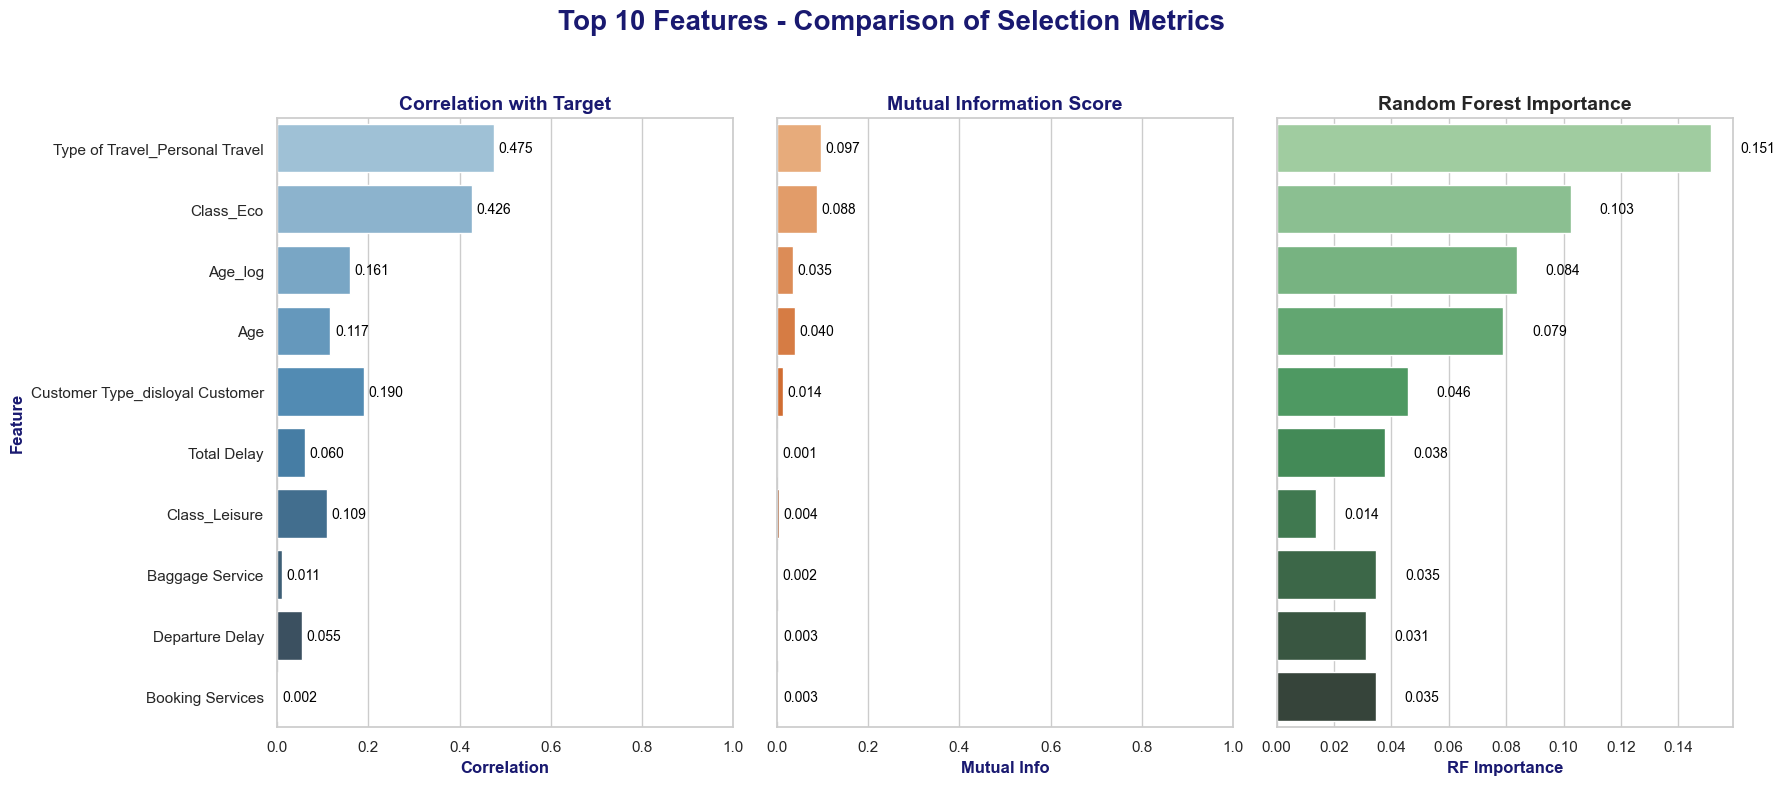

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Take top 10 features
top10 = best_features.head(10).copy()

# Set style
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 8), sharey=True)

# Barplot for Correlation
sns.barplot(
    data=top10,
    y='Feature',
    x='Corr',
    palette='Blues_d',
    ax=axes[0]
)
axes[0].set_title('Correlation with Target', fontsize=14, fontweight='bold',color='midnightblue')
axes[0].set_xlim(0, 1)  # Set x-axis limit for better visibility
axes[0].set_xlabel('Correlation', fontsize=12, weight='bold', color='midnightblue')
axes[0].set_ylabel('Feature', fontsize=12, weight='bold', color='midnightblue')
# Annotate bars
for i, v in enumerate(top10['Corr']):
    axes[0].text(v + 0.01, i, f"{v:.3f}", color='black', va='center', fontsize=10)

# Barplot for Mutual Information
sns.barplot(
    data=top10,
    y='Feature',
    x='Mutual Info',
    palette='Oranges_d',
    ax=axes[1]
)
axes[1].set_title('Mutual Information Score', fontsize=14, fontweight='bold', color='midnightblue')
axes[1].set_xlim(0, 1)  # Set x-axis limit for better visibility
axes[1].set_xlabel('Mutual Info', fontsize=12, weight='bold', color='midnightblue')
# Annotate bars
for i, v in enumerate(top10['Mutual Info']):
    axes[1].text(v + 0.01, i, f"{v:.3f}", color='black', va='center', fontsize=10)  
axes[1].set_ylabel('')

# Barplot for Random Forest Importance
sns.barplot(
    data=top10,
    y='Feature',
    x='RF Importance',
    palette='Greens_d',
    ax=axes[2]
)
axes[2].set_title('Random Forest Importance', fontsize=14, fontweight='bold')
axes[2].set_xlabel('RF Importance', fontsize=12, weight='bold', color='midnightblue')
# Annotate bars
for i, v in enumerate(top10['RF Importance']):
    axes[2].text(v + 0.01, i, f"{v:.3f}", color='black', va='center', fontsize=10)
axes[2].set_ylabel('')

# Final layout
plt.suptitle('Top 10 Features - Comparison of Selection Metrics', fontsize=20, fontweight='bold', color='midnightblue')
plt.subplots_adjust(top=0.85)  # Adjust top space for title
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


#### Balancing the Dataset 

#### Step 1: Load the dataset and separate features from the target

In [60]:
import pandas as pd

# Load dataset
dataset3 = pd.read_csv('scaled_dataset.csv')

# Separate features and target
X = dataset3.drop(columns=['Satisfaction_Satisfied'])
y = dataset3['Satisfaction_Satisfied']

# Check class distribution
print("Class Distribution:")
print(y.value_counts())


Class Distribution:
Satisfaction_Satisfied
True     14995
False     5005
Name: count, dtype: int64


#### Step 2: Apply SMOTE for Oversampling the Minority Class

SMOTE (Synthetic Minority Over-sampling Technique) generates synthetic examples for the minority class (Dissatisfied) to balance the class distribution. Here’s how you can implement it:

In [61]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check new class distribution
print("New Class Distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts())


New Class Distribution after SMOTE:
Satisfaction_Satisfied
True     14995
False    14995
Name: count, dtype: int64


#### Step 3: Undersampling the Majority Class (Alternative to SMOTE)

In [62]:
from sklearn.utils import resample

# Combine X and y into a single dataframe
data = pd.concat([X, y], axis=1)

# Ensure that the 'Satisfaction_Satisfied' column is treated as a string (or numeric if preferred)
data['Satisfaction_Satisfied'] = data['Satisfaction_Satisfied'].astype(str)

# Separate the majority and minority classes
majority_class = data[data['Satisfaction_Satisfied'] == 'True']
minority_class = data[data['Satisfaction_Satisfied'] == 'False']

# Undersample the majority class, ensure that n_samples is set to the minority class size
majority_class_undersampled = resample(majority_class, 
                                       replace=False,    # without replacement
                                       n_samples=len(minority_class),  # match minority class size
                                       random_state=42)

# Combine the minority class and the undersampled majority class
data_undersampled = pd.concat([majority_class_undersampled, minority_class])

# Separate the features and target again
X_undersampled = data_undersampled.drop(columns=['Satisfaction_Satisfied'])
y_undersampled = data_undersampled['Satisfaction_Satisfied']

# Check new class distribution
print("New Class Distribution after Undersampling:")
print(pd.Series(y_undersampled).value_counts())

New Class Distribution after Undersampling:
Satisfaction_Satisfied
True     5005
False    5005
Name: count, dtype: int64


#### Visualizing Class Balancing

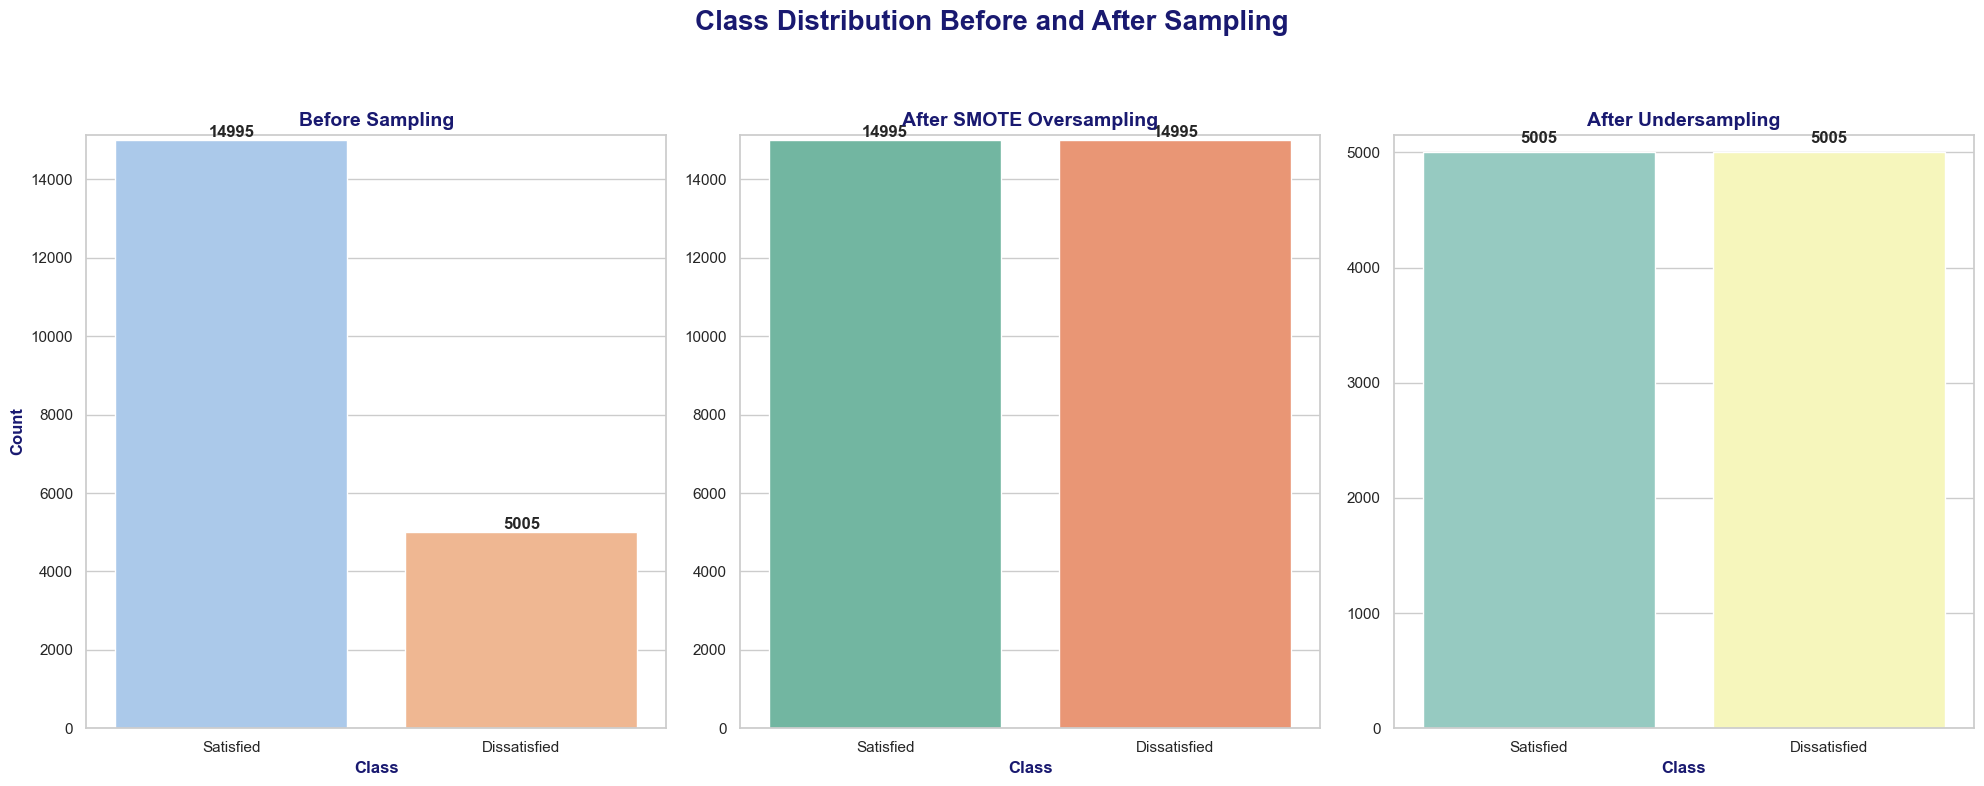

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

# Load dataset
dataset3 = pd.read_csv('scaled_dataset.csv')

# Separate features and target
X = dataset3.drop(columns=['Satisfaction_Satisfied'])
y = dataset3['Satisfaction_Satisfied']

# Convert to string and relabel True/False to Satisfied/Dissatisfied
y = y.map({True: 'Satisfied', False: 'Dissatisfied'}).astype(str)

# --- 1. Class distribution before sampling ---
class_counts_before = y.value_counts()

# --- 2. Apply SMOTE for oversampling ---
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
class_counts_smote = pd.Series(y_resampled).value_counts()

# Combine X_resampled and y_resampled for saving
balanced_dataset = pd.DataFrame(X_resampled, columns=X.columns)
balanced_dataset['Satisfaction_Satisfied'] = y_resampled
balanced_dataset.to_csv('balanced_dataset.csv', index=False)

# --- 3. Apply undersampling ---
data = pd.concat([X, y], axis=1)
majority_class = data[data['Satisfaction_Satisfied'] == 'Satisfied']
minority_class = data[data['Satisfaction_Satisfied'] == 'Dissatisfied']

majority_undersampled = resample(
    majority_class,
    replace=False,
    n_samples=len(minority_class),
    random_state=42
)

data_undersampled = pd.concat([majority_undersampled, minority_class])
y_undersampled = data_undersampled['Satisfaction_Satisfied'].astype(str)
class_counts_undersampled = y_undersampled.value_counts()

# --- 4. Plotting ---
fig, axes = plt.subplots(1, 3, figsize=(20, 8))
sns.set_style("whitegrid")

# Plot before sampling
sns.barplot(x=class_counts_before.index, y=class_counts_before.values, palette='pastel', ax=axes[0])
axes[0].set_title("Before Sampling", fontsize=14, fontweight='bold', color='midnightblue')
axes[0].set_ylabel("Count", fontsize=12, weight='bold', color='midnightblue')
axes[0].set_ylim(0, class_counts_before.max() + 150)
axes[0].set_xlabel("Class", fontsize=12, weight='bold', color='midnightblue')
for i, v in enumerate(class_counts_before.values):
    axes[0].text(i, v + 80, str(v), ha='center', fontweight='bold')

# Plot after SMOTE
sns.barplot(x=class_counts_smote.index, y=class_counts_smote.values, palette='Set2', ax=axes[1])
axes[1].set_title("After SMOTE Oversampling", fontsize=14, fontweight='bold', color='midnightblue')
axes[1].set_ylabel("")
axes[1].set_xlabel("Class", fontsize=12, weight='bold', color='midnightblue')
axes[1].set_ylim(0, class_counts_smote.max() + 150)
for i, v in enumerate(class_counts_smote.values):
    axes[1].text(i, v + 80, str(v), ha='center', fontweight='bold')

# Plot after undersampling
sns.barplot(x=class_counts_undersampled.index, y=class_counts_undersampled.values, palette='Set3', ax=axes[2])
axes[2].set_title("After Undersampling", fontsize=14, fontweight='bold', color='midnightblue')
axes[2].set_ylim(0, class_counts_undersampled.max() + 150)
axes[2].set_ylabel("")
axes[2].set_xlabel("Class", fontsize=12, weight='bold', color='midnightblue')
for i, v in enumerate(class_counts_undersampled.values):
    axes[2].text(i, v + 80, str(v), ha='center', fontweight='bold')

plt.suptitle("Class Distribution Before and After Sampling", fontsize=20, fontweight='bold', color='midnightblue')
plt.subplots_adjust(top=0.85, wspace=0.3)
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()


#### Balanced dataset

In [77]:
df = pd.read_csv('balanced_dataset.csv')

In [78]:
df.shape

(29990, 23)

#### Train Test Split

In [79]:
# Step 1: Import the required library
from sklearn.model_selection import train_test_split

In [80]:
# Step 2: Prepare your features (X) and target (y)
X = df.drop(columns=['Satisfaction_Satisfied'])
y = df['Satisfaction_Satisfied']

In [81]:
# Step 3: Perform the 80/20 train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.20,       # 20% for testing
    random_state=42,      # ensures reproducibility
    stratify=y            # maintain class distribution in both sets
)

In [82]:
# Step 4: Confirm the split sizes
print(f"Total records: {len(dataset3)}")
print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")


Total records: 20000
Training set size: 23992
Testing set size: 5998


In [83]:
#Step 5: (Optional) Check class distribution in each set
print("Class distribution in y_train:")
print(y_train.value_counts(normalize=True))

print("\nClass distribution in y_test:")
print(y_test.value_counts(normalize=True))


Class distribution in y_train:
Satisfaction_Satisfied
Satisfied       0.5
Dissatisfied    0.5
Name: proportion, dtype: float64

Class distribution in y_test:
Satisfaction_Satisfied
Dissatisfied    0.5
Satisfied       0.5
Name: proportion, dtype: float64


In [84]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your dataset
dataset = pd.read_csv('balanced_dataset.csv')  # Replace with your actual file path

# Separate features and target
X = dataset.drop(columns=['Satisfaction_Satisfied'])
y = dataset['Satisfaction_Satisfied']

# Perform 80/20 train-test split with stratification to preserve class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,        # 20% for testing
    random_state=42,       # for reproducibility
    stratify=y             # maintain class balance
)

# Print dataset sizes
print(f"Total records: {len(dataset)}")
print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

# Print class distribution in each set
print("\nClass distribution in training set:")
print(y_train.value_counts(normalize=True))

print("\nClass distribution in test set:")
print(y_test.value_counts(normalize=True))


Total records: 29990
Training set size: 23992
Testing set size: 5998

Class distribution in training set:
Satisfaction_Satisfied
Satisfied       0.5
Dissatisfied    0.5
Name: proportion, dtype: float64

Class distribution in test set:
Satisfaction_Satisfied
Dissatisfied    0.5
Satisfied       0.5
Name: proportion, dtype: float64


#### Visualizing train Test Split

Total records: 29990
Training set size: 23992
Testing set size: 5998

Class distribution in training set:
Satisfaction_Satisfied
Satisfied       0.5
Dissatisfied    0.5
Name: proportion, dtype: float64

Class distribution in test set:
Satisfaction_Satisfied
Dissatisfied    0.5
Satisfied       0.5
Name: proportion, dtype: float64


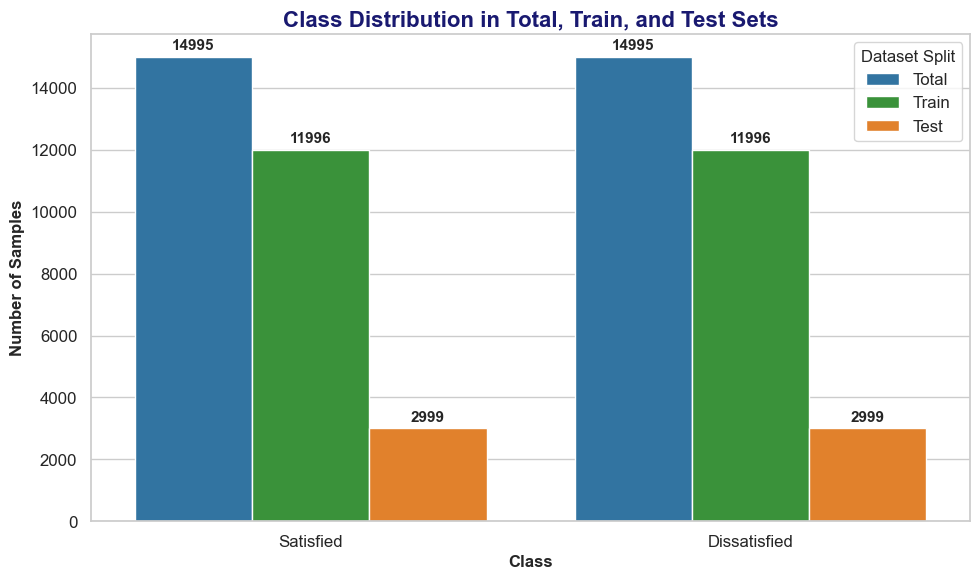

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Load your dataset
dataset = pd.read_csv('balanced_dataset.csv')  # Replace with your actual file path

# Separate features and target
X = dataset.drop(columns=['Satisfaction_Satisfied'])
y = dataset['Satisfaction_Satisfied']

# Perform 80/20 train-test split with stratification to preserve class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

# Print dataset sizes
print(f"Total records: {len(dataset)}")
print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

# Print class distribution
print("\nClass distribution in training set:")
print(y_train.value_counts(normalize=True))

print("\nClass distribution in test set:")
print(y_test.value_counts(normalize=True))

# --- Visualization ---
# Prepare distribution DataFrames for Train, Test, and Total
train_dist = y_train.value_counts().rename_axis('Class').reset_index(name='Count')
train_dist['Set'] = 'Train'

test_dist = y_test.value_counts().rename_axis('Class').reset_index(name='Count')
test_dist['Set'] = 'Test'

total_dist = y.value_counts().rename_axis('Class').reset_index(name='Count')
total_dist['Set'] = 'Total'

# Combine all into one DataFrame
dist_df = pd.concat([total_dist, train_dist, test_dist], ignore_index=True)

# Custom color palette
custom_palette = {'Total': '#1f77b4', 'Train': '#2ca02c', 'Test': '#ff7f0e'}  # blue, green, orange

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=dist_df, x='Class', y='Count', hue='Set', palette=custom_palette)

# Annotate each bar with its count
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3, fontsize=11, fontweight='bold')

plt.title("Class Distribution in Total, Train, and Test Sets", fontsize=16, weight='bold', color='midnightblue')
plt.xlabel("Class", fontsize=12, weight='bold')
plt.ylabel("Number of Samples", fontsize=12, weight='bold')
plt.legend(title="Dataset Split", title_fontsize=12)
plt.tight_layout()
plt.show()

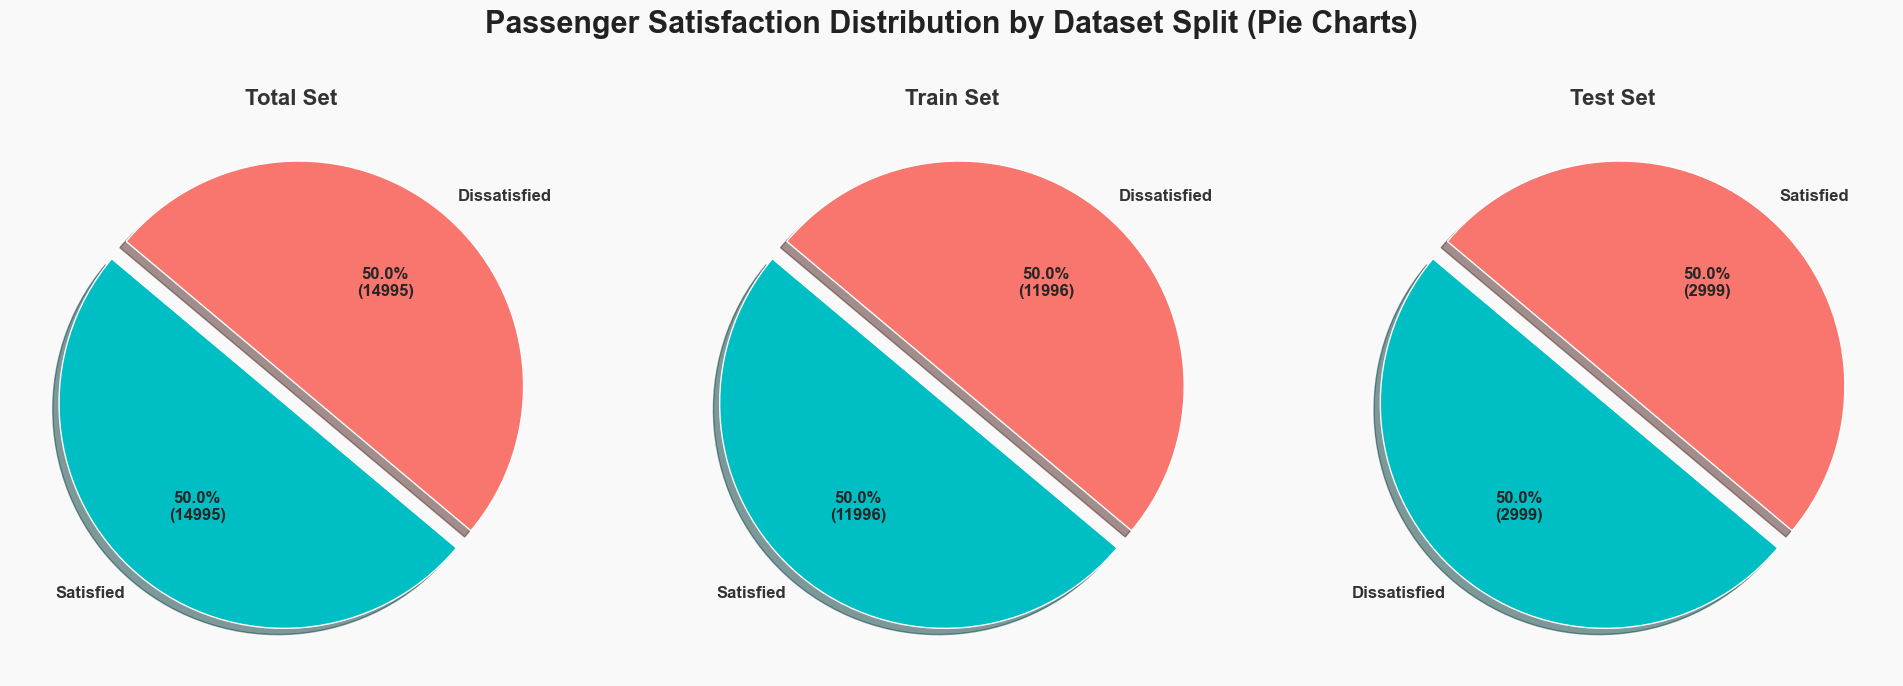

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Handle warnings
import warnings
warnings.filterwarnings('ignore')

# Load the balanced dataset
dataset = pd.read_csv('balanced_dataset.csv')  # Replace with your actual file path

# Separate features and target
X = dataset.drop(columns=['Satisfaction_Satisfied'])
y = dataset['Satisfaction_Satisfied']

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# Create labeled DataFrames
train_dist = pd.DataFrame({'Set': 'Train', 'Satisfaction': y_train})
test_dist = pd.DataFrame({'Set': 'Test', 'Satisfaction': y_test})
total_dist = pd.DataFrame({'Set': 'Total', 'Satisfaction': y})
combined_dist = pd.concat([total_dist, train_dist, test_dist])

# Convert boolean to readable labels
label_map = {True: 'Satisfied', False: 'Dissatisfied'}
combined_dist['Satisfaction'] = combined_dist['Satisfaction'].map(label_map)

# Color palette
custom_colors = ['#00BFC4', '#F8766D']  # Attractive blue & coral

# Pie chart layout
fig, axes = plt.subplots(1, 3, figsize=(20, 7), facecolor='#f9f9f9')
sets = {'Total': total_dist, 'Train': train_dist, 'Test': test_dist}

for ax, (name, df) in zip(axes, sets.items()):
    counts = df['Satisfaction'].value_counts()
    explode = (0.05, 0.05)  # Slight separation between slices
    wedges, texts, autotexts = ax.pie(
        counts,
        labels=counts.index,
        autopct=lambda p: f'{p:.1f}%\n({int(p * sum(counts) / 100)})',
        startangle=140,
        colors=custom_colors,
        explode=explode,
        shadow=True,
        textprops={'fontsize': 12, 'weight': 'bold'}
    )
    for text in texts:
        text.set_color('#333333')
    ax.set_title(f'{name} Set', fontsize=16, fontweight='bold', color='#333333')
    ax.set_aspect('equal')

# Main title
fig.suptitle('Passenger Satisfaction Distribution by Dataset Split (Pie Charts)', 
             fontsize=22, fontweight='bold', color='#222222')

plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()
